<a href="https://colab.research.google.com/github/gnicolasgutierrez/ProyectoDS_ParteIII_Gutierrez_Nicolas/blob/main/proyectods_parteiii_gutierreznicolas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Proyecto Final: Análisis de datos del conjunto de datos: Accidentes de tráfico**


---

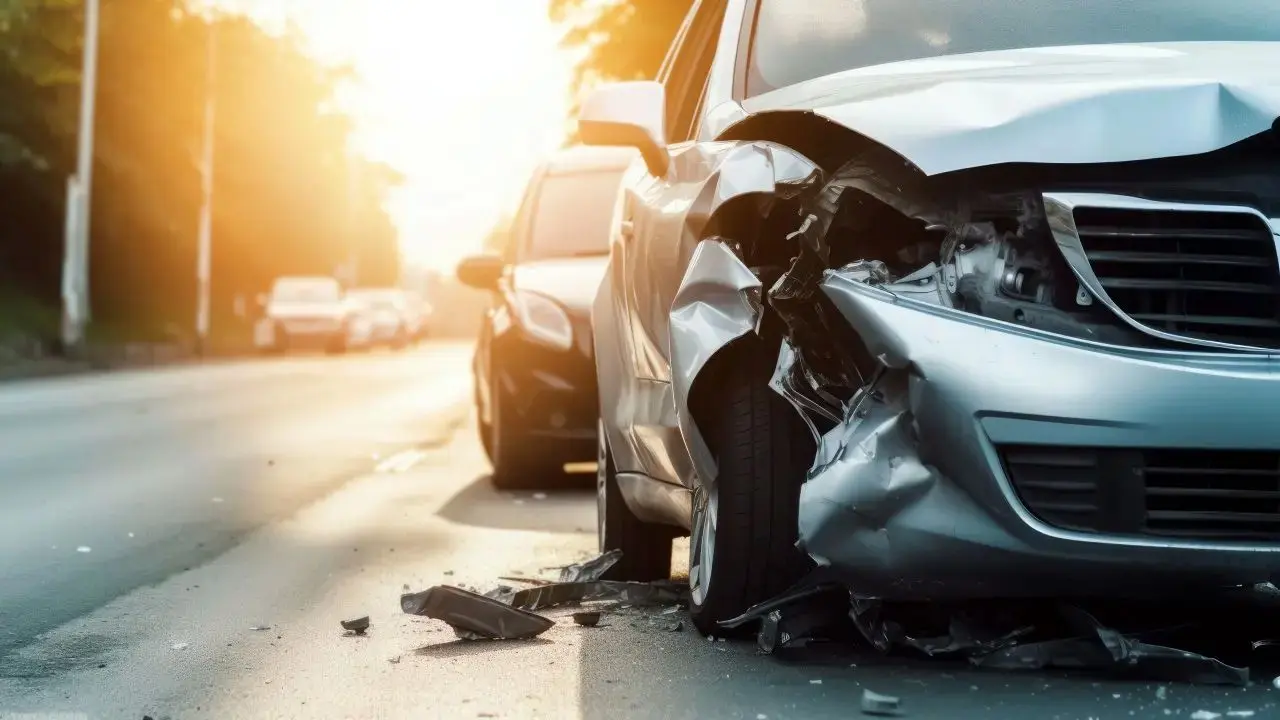
---

**Descripción del Proyecto**

Este proyecto tiene como objetivo predecir la severidad de los accidentes de tráfico utilizando un conjunto de datos detallado que incluye una amplia variedad de variables relacionadas con los conductores, vehículos, condiciones de la carretera y del clima. A través de la reducción de dimensionalidad, el uso de algoritmos de clasificación y la validación de modelos, buscamos identificar patrones y factores de riesgo que contribuyan a la ocurrencia y gravedad de los accidentes, proporcionando información valiosa para la implementación de medidas preventivas y de control para mejorar la seguridad vial.

---

**Audiencia**

Este proyecto está dirigido a analistas de datos, investigadores de seguridad vial, autoridades de tráfico y cualquier persona interesada en aprender técnicas de análisis de datos y modelado predictivo aplicadas a la seguridad vial. Los resultados de este proyecto pueden ser útiles para mejorar la toma de decisiones en políticas públicas y estrategias para reducir la incidencia y gravedad de los accidentes de tráfico.


---

**Preguntas de Investigación**



1.   ¿Cuáles son los factores más importantes que contribuyen a la cantidad de accidentes de tráfico?
2.   ¿Existen patrones temporales (por ejemplo, hora del día, día de la semana) que influyen en la fecuencia de los accidentes?
3. ¿Qué impacto tienen las características del conductor (edad, sexo, experiencia) en la frecuencia de los accidentes?
4. ¿Es posible predecir un accidente con una precisión razonable utilizando técnicas de modelado predictivo?






---

**Objetivo del Proyecto**

El objetivo principal de este proyecto es desarrollar un modelo predictivo que pueda determinar la severidad de los accidentes de tráfico basándose en un conjunto de características relevantes. Este modelo ayudará a identificar factores críticos y a tomar decisiones informadas para mejorar la seguridad vial

---
**Autor**: Guillermo Nicolás Gutierrez

**Email**: gnicolasgutierrez@gmail.com




# **2. Importación de datos y librerias**

In [ ]:
# Imports de bibliotecas para manipulación de datos y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Imports de bibliotecas para modelado y aprendizaje automático
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve, roc_curve, auc
from google.colab import drive
drive.mount('/content/drive')

%cd 'drive/MyDrive/ColabNotebooks/Proyecto'

Mounted at /content/drive
/content/drive/MyDrive/ColabNotebooks/Proyecto


In [ ]:
df=pd.read_csv("RTADataset.csv")



# **3. Análisis inicial del dataset**

In [ ]:
df.head() # Muestro las primeras filas del Data frame

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Above 10yr  ...   Going straight   
1            Owner                 5-10yrs  ...   Going straight   
2            Owner                     NaN  ...   Going straight   
3     Governmental                     NaN  ...   Going straight   
4            Owner                 5-10yrs  ...   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3            Driver               Normal    Not a Pedestrian   
4               NaN                  NaN    Not a Pedestrian   

            Cause_of_accident Accident_severity  
0             Moving Backward     Slight Injury  
1                  Overtaking     Slight Injury  
2   Changing lane to the left    Serious Injury  
3  Changing lane to the right     Slight Injury  
4                  Overtaking     Slight Injury  

[5 rows x 32 columns]

In [ ]:
df.shape # Muestro las dimensiones del Data frame

(12316, 32)

In [ ]:
df.info() # Muestro la información del Data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [ ]:
df.describe() # Muestro estadísticas descriptivas del Data frame

Number_of_vehicles_involved  Number_of_casualties
count                 12316.000000          12316.000000
mean                      2.040679              1.548149
std                       0.688790              1.007179
min                       1.000000              1.000000
25%                       2.000000              1.000000
50%                       2.000000              1.000000
75%                       2.000000              2.000000
max                       7.000000              8.000000

In [ ]:
df.sample(5) # Muestro 5 filas aleatorias del Data frame

Time Day_of_week Age_band_of_driver Sex_of_driver  \
5320    8:00:00      Friday              31-50          Male   
380    18:32:00     Tuesday              31-50          Male   
8301   19:15:00      Monday              31-50          Male   
10457  11:29:00    Saturday            Over 51          Male   
3529   21:38:00   Wednesday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
5320    Elementary school                Employee              2-5yr   
380    Junior high school                Employee              2-5yr   
8301   Junior high school                Employee             5-10yr   
10457  Junior high school                   Owner              1-2yr   
3529   Junior high school                Employee              1-2yr   

         Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  ...  \
5320                 NaN            Owner                 5-10yrs  ...   
380    Public (12 seats)            Owner                  2-5yrs  ...   
8301      Lorry (11?40Q)            Owner                  2-5yrs  ...   
10457               Taxi            Owner                     NaN  ...   
3529        Stationwagen            Owner                 Unknown  ...   

      Vehicle_movement   Casualty_class Sex_of_casualty Age_band_of_casualty  \
5320    Going straight               na              na                   na   
380     Going straight       Pedestrian          Female                31-50   
8301    Going straight  Driver or rider            Male                31-50   
10457   Going straight  Driver or rider            Male             Under 18   
3529    Going straight               na              na                   na   

      Casualty_severity Work_of_casuality Fitness_of_casuality  \
5320                 na             Other               Normal   
380                   3            Driver               Normal   
8301                  3            Driver               Normal   
10457                 2               NaN                  NaN   
3529                 na               NaN               Normal   

                                     Pedestrian_movement  \
5320                                    Not a Pedestrian   
380    Crossing from nearside - masked by parked or s...   
8301                                    Not a Pedestrian   
10457                                   Not a Pedestrian   
3529                                    Not a Pedestrian   

               Cause_of_accident Accident_severity  
5320   No priority to pedestrian     Slight Injury  
380                No distancing     Slight Injury  
8301   No priority to pedestrian     Slight Injury  
10457                   Turnover     Slight Injury  
3529             Moving Backward     Slight Injury  

[5 rows x 32 columns]

In [ ]:
df.tail() # Muestro las últimas filas del Data frame

Time Day_of_week Age_band_of_driver Sex_of_driver  \
12311  16:15:00   Wednesday              31-50          Male   
12312  18:00:00      Sunday            Unknown          Male   
12313  13:55:00      Sunday            Over 51          Male   
12314  13:55:00      Sunday              18-30        Female   
12315  13:55:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
12311                 NaN                Employee              2-5yr   
12312   Elementary school                Employee             5-10yr   
12313  Junior high school                Employee             5-10yr   
12314  Junior high school                Employee         Above 10yr   
12315  Junior high school                Employee             5-10yr   

       Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  ...  \
12311   Lorry (11?40Q)            Owner                     NaN  ...   
12312       Automobile            Owner                     NaN  ...   
12313            Bajaj            Owner                  2-5yrs  ...   
12314  Lorry (41?100Q)            Owner                  2-5yrs  ...   
12315            Other            Owner                  2-5yrs  ...   

      Vehicle_movement   Casualty_class Sex_of_casualty Age_band_of_casualty  \
12311   Going straight               na              na                   na   
12312            Other               na              na                   na   
12313            Other  Driver or rider            Male                31-50   
12314            Other               na              na                   na   
12315         Stopping       Pedestrian          Female                    5   

      Casualty_severity Work_of_casuality Fitness_of_casuality  \
12311                na            Driver               Normal   
12312                na            Driver               Normal   
12313                 3            Driver               Normal   
12314                na            Driver               Normal   
12315                 3            Driver               Normal   

                                     Pedestrian_movement  \
12311                                   Not a Pedestrian   
12312                                   Not a Pedestrian   
12313                                   Not a Pedestrian   
12314                                   Not a Pedestrian   
12315  Crossing from nearside - masked by parked or s...   

                          Cause_of_accident Accident_severity  
12311                         No distancing     Slight Injury  
12312                         No distancing     Slight Injury  
12313            Changing lane to the right    Serious Injury  
12314  Driving under the influence of drugs     Slight Injury  
12315            Changing lane to the right     Slight Injury  

[5 rows x 32 columns]

In [ ]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

**Descripción de variables**

**Time** (Hora) La hora del día en que ocurrió el accidente.



* **Day_of_week** (Día de la semana): El día de la semana en que ocurrió el accidente.

* **Age_band_of_driver** (Grupo de edad del conductor): El rango de edad del conductor involucrado en el accidente.

* **Sex_of_driver** (Sexo del conductor): El sexo del conductor involucrado en el accidente.

* **Educational_level** (Nivel educativo): El nivel educativo del conductor.

* **Vehicle_driver_relation** (Relación del conductor con el vehículo): La relación entre el conductor y el vehículo (por ejemplo, propietario, alquilado, etc.).
* **Driving_experience** (Experiencia de conducción): El nivel de experiencia del conductor en términos de años de conducción.
* **Type_of_vehicle** (Tipo de vehículo): El tipo de vehículo involucrado en el accidente (por ejemplo, automóvil, motocicleta, etc.).
* **Owner_of_vehicle** (Propietario del vehículo): Indica si el conductor es el propietario del vehículo.
* **Service_year_of_vehicle** (Año de servicio del vehículo): Los años de servicio del vehículo involucrado en el accidente.
* **Defect_of_vehicle** (Defecto del vehículo): Cualquier defecto presente en el vehículo en el momento del accidente.
* **Area_accident_occured** (Área donde ocurrió el accidente): La ubicación del accidente (por ejemplo, urbana, rural, etc.).
* **Lanes_or_Medians** (Carriles o medianas): Información sobre la presencia de carriles o medianas en el lugar del accidente.
* **Road_allignment** (Alineación de la carretera): La alineación de la carretera en el lugar del accidente (por ejemplo, recta, curva, etc.).
* **Types_of_Junction** (Tipos de intersección): El tipo de intersección donde ocurrió el accidente (por ejemplo, cruce, rotonda, etc.).
* **Road_surface_type** (Tipo de superficie de la carretera): El tipo de superficie de la carretera en el lugar del accidente.
* **Road_surface_conditions** (Condiciones de la superficie de la carretera): Las condiciones de la superficie de la carretera en el momento del accidente (por ejemplo, seca, mojada, etc.).
* **Light_conditions** (Condiciones de luz): Las condiciones de luz en el momento del accidente (por ejemplo, día, noche, etc.).
* **Weather_conditions** (Condiciones meteorológicas): Las condiciones meteorológicas en el momento del accidente (por ejemplo, soleado, lluvioso, etc.).
* **Type_of_collision** (Tipo de colisión): El tipo de colisión que ocurrió (por ejemplo, frontal, trasera, etc.).
* **Number_of_vehicles_involved** (Número de vehículos involucrados): El número de vehículos involucrados en el accidente.
* **Number_of_casualties** (Número de víctimas): El número de personas lesionadas o fallecidas en el accidente.
* **Vehicle_movement** (Movimiento del vehículo): El movimiento del vehículo en el momento del accidente.
* **Casualty_class** (Clase de víctima): La clase de víctima (por ejemplo, conductor, pasajero, peatón, etc.).
* **Sex_of_casualty** (Sexo de la víctima): El sexo de la víctima involucrada en el accidente.
* **Age_band_of_casualty** (Grupo de edad de la víctima): El rango de edad de la víctima involucrada en el accidente.
* **Casualty_severity** (Gravedad de la víctima): La gravedad de las lesiones de la víctima.
* **Work_of_casuality** (Ocupación de la víctima): La ocupación de la víctima.
* **Fitness_of_casuality** (Estado físico de la víctima): El estado físico de la víctima en el momento del accidente.
* **Pedestrian_movement** (Movimiento del peatón): El movimiento del peatón en el momento del accidente, si corresponde.
* **Cause_of_accident** (Causa del accidente): La causa principal del accidente.
* **Accident_severity** (Gravedad del accidente): La gravedad general del accidente (por ejemplo, leve, grave, fatal)

In [ ]:
df.dtypes.value_counts() # Muestro la cantidad de variables por tipo

object    30
int64      2
Name: count, dtype: int64

In [ ]:
df.describe().T # Muestro estadísticas descriptivas de las variables numéricas

count      mean       std  min  25%  50%  75%  \
Number_of_vehicles_involved  12316.0  2.040679  0.688790  1.0  2.0  2.0  2.0   
Number_of_casualties         12316.0  1.548149  1.007179  1.0  1.0  1.0  2.0   

                             max  
Number_of_vehicles_involved  7.0  
Number_of_casualties         8.0

In [ ]:
df.describe(include=['object']).T # Muestro estadísticas descriptivas de las variables categóricas

count unique  \
Time                     12316   1074   
Day_of_week              12316      7   
Age_band_of_driver       12316      5   
Sex_of_driver            12316      3   
Educational_level        11575      7   
Vehicle_driver_relation  11737      4   
Driving_experience       11487      7   
Type_of_vehicle          11366     17   
Owner_of_vehicle         11834      4   
Service_year_of_vehicle   8388      6   
Defect_of_vehicle         7889      3   
Area_accident_occured    12077     14   
Lanes_or_Medians         11931      7   
Road_allignment          12174      9   
Types_of_Junction        11429      8   
Road_surface_type        12144      5   
Road_surface_conditions  12316      4   
Light_conditions         12316      4   
Weather_conditions       12316      9   
Type_of_collision        12161     10   
Vehicle_movement         12008     13   
Casualty_class           12316      4   
Sex_of_casualty          12316      3   
Age_band_of_casualty     12316      6   
Casualty_severity        12316      4   
Work_of_casuality         9118      7   
Fitness_of_casuality      9681      5   
Pedestrian_movement      12316      9   
Cause_of_accident        12316     20   
Accident_severity        12316      3   

                                                                      top  \
Time                                                             15:30:00   
Day_of_week                                                        Friday   
Age_band_of_driver                                                  18-30   
Sex_of_driver                                                        Male   
Educational_level                                      Junior high school   
Vehicle_driver_relation                                          Employee   
Driving_experience                                                 5-10yr   
Type_of_vehicle                                                Automobile   
Owner_of_vehicle                                                    Owner   
Service_year_of_vehicle                                           Unknown   
Defect_of_vehicle                                               No defect   
Area_accident_occured                                               Other   
Lanes_or_Medians         Two-way (divided with broken lines road marking)   
Road_allignment                            Tangent road with flat terrain   
Types_of_Junction                                                 Y Shape   
Road_surface_type                                           Asphalt roads   
Road_surface_conditions                                               Dry   
Light_conditions                                                 Daylight   
Weather_conditions                                                 Normal   
Type_of_collision                          Vehicle with vehicle collision   
Vehicle_movement                                           Going straight   
Casualty_class                                            Driver or rider   
Sex_of_casualty                                                      Male   
Age_band_of_casualty                                                   na   
Casualty_severity                                                       3   
Work_of_casuality                                                  Driver   
Fitness_of_casuality                                               Normal   
Pedestrian_movement                                      Not a Pedestrian   
Cause_of_accident                                           No distancing   
Accident_severity                                           Slight Injury   

                          freq  
Time                       120  
Day_of_week               2041  
Age_band_of_driver        4271  
Sex_of_driver            11437  
Educational_level         7619  
Vehicle_driver_relation   9627  
Driving_experience        3363  
Type_of_vehicle           3205  
Owner_of_vehicle         10459  
Service_year_of_vehicle   2883  
De

In [ ]:
# Tamaño del conjunto de datos
print("Filas, columnas: ", df.shape)

# Nombres de las variables
print("\nNombres de las variables: \n", df.columns)

# Tipo de datos de cada variable
print("\nTipos de datos: \n", df.dtypes)

# Verificar la presencia de valores faltantes
print("\nValores faltantes: \n", df.isnull().sum())

# Estadísticas descriptivas de las variables numéricas
print("\nEstadísticas descriptivas: \n", df.describe(include=[np.number]))

# Frecuencia de valores únicos en las variables categóricas
for col in df.select_dtypes(include=['object']).columns:
    print("\nFrecuencia de valores únicos de", col)
    print(df[col].value_counts())

Filas, columnas:  (12316, 32)

Nombres de las variables: 
 Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

Tipos de datos: 
 Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver             

# **4. Limpieza y transformación de datos**

**Valores duplicados**

In [ ]:
df.duplicated().sum()

0

**Valores nulos**

In [ ]:
df.isnull().sum() # Muestro la cantidad de valores nulos por variable

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3198
Fitness_of_casuality           2635
Pedestrian_movement               0
Cause_of_accident                 0
Accident_severity                 0
dtype: int64

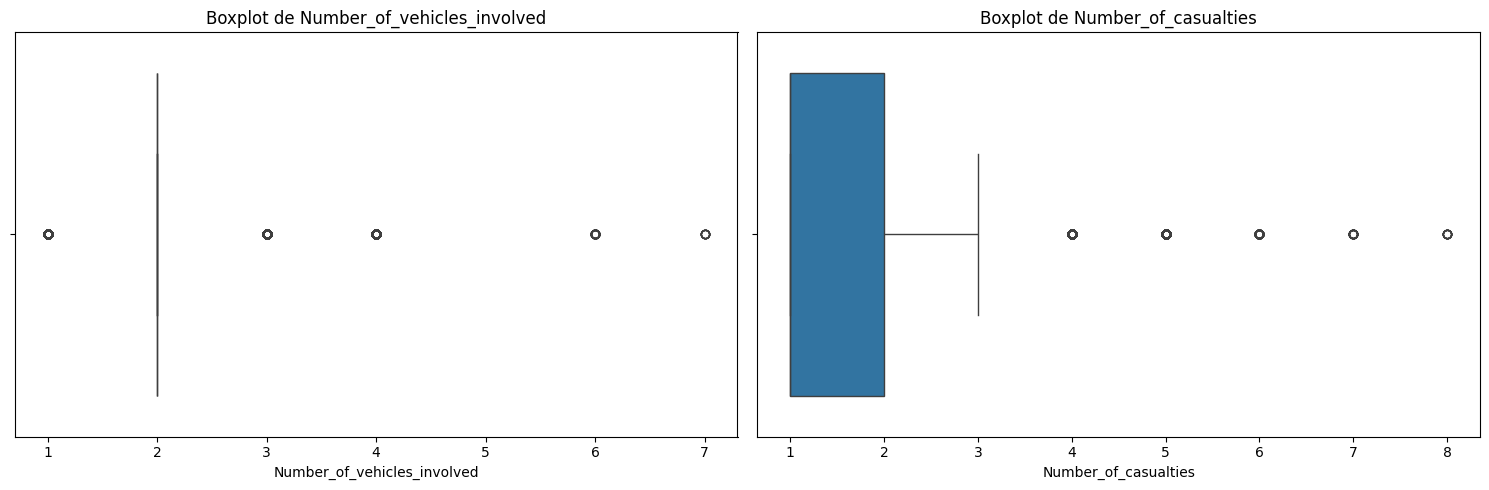

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calcular el número de filas y columnas para los subgráficos
num_vars = len(numeric_columns.columns)
num_rows = (num_vars // 3) + (1 if num_vars % 3 > 0 else 0)
num_cols = min(num_vars, 3)

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 5*num_rows))

# Generar y mostrar los diagramas de caja para cada variable numérica
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(x=df[col])
    plt.title("Boxplot de {}".format(col))
    plt.tight_layout()

plt.show()

# **5. Análisis Exploratorio de Datos (EDA)**

Análisis univariado

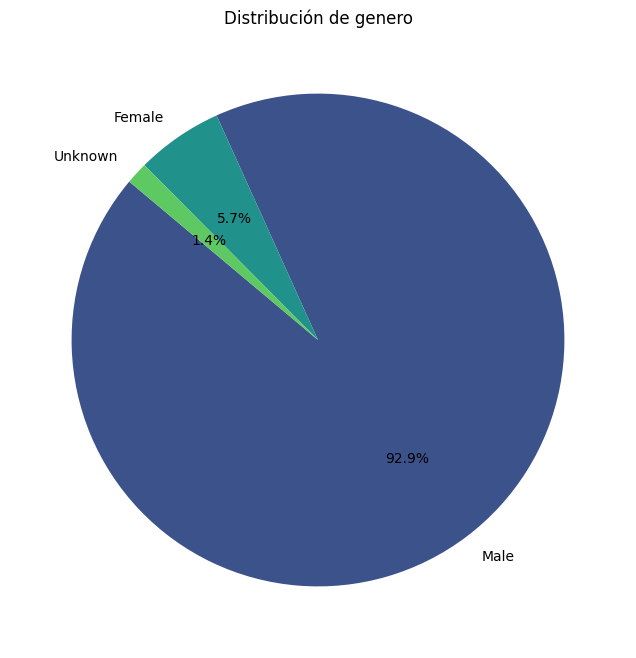

In [ ]:
gender_counts = df['Sex_of_driver'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(gender_counts)))

plt.title('Distribución de genero')

plt.show()

<ipython-input-19-36a46d2a6e89>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accidents_per_bin = df.groupby(['Time_Bin', 'Sex_of_driver']).size().reset_index(name='Accidents_Count')


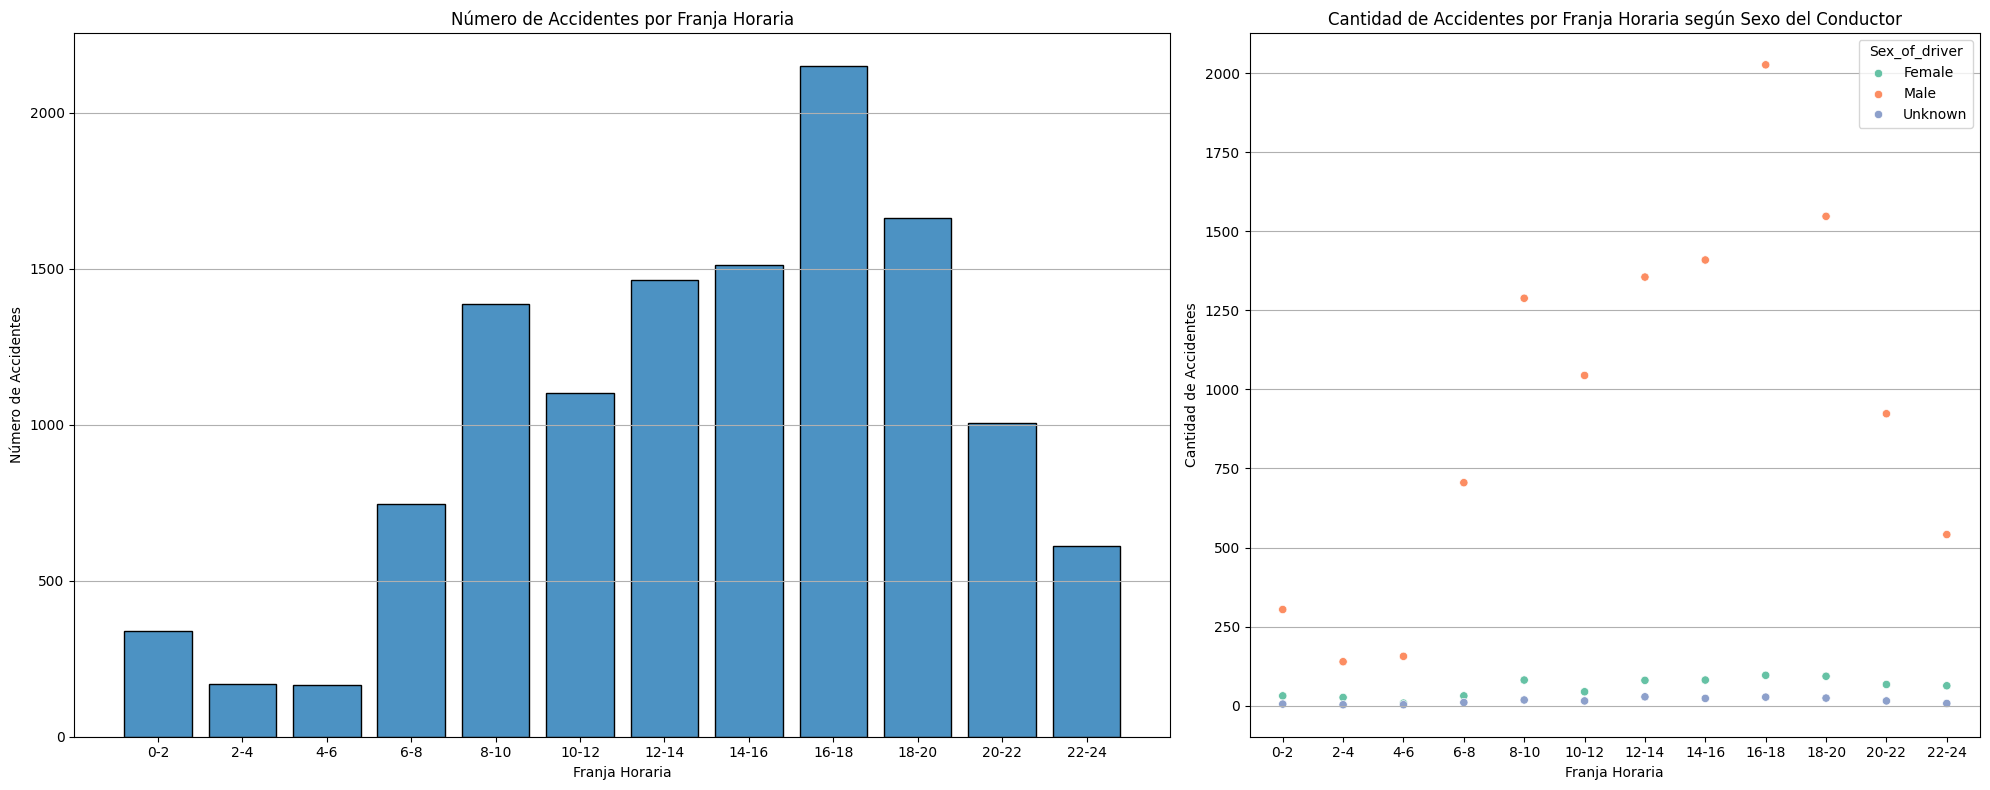

In [ ]:
bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16', '16-18', '18-20', '20-22', '22-24']

# Convertir la columna 'Time' a datetime y extraer la hora del día (0-23)
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

# Categorizar las horas en franjas horarias
df['Time_Bin'] = pd.cut(df['Time'], bins=bins, labels=labels, right=False, include_lowest=True)

# Contar el número de accidentes en cada franja horaria según el sexo del conductor
accidents_per_bin = df.groupby(['Time_Bin', 'Sex_of_driver']).size().reset_index(name='Accidents_Count')

# Crear gráficos en subplots
f, axs = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw=dict(width_ratios=[3, 2]))

# Crear el histograma de accidentes por franja horaria general
sns.histplot(data=df, x='Time_Bin', shrink=.8, alpha=.8, legend=False, ax=axs[0])
axs[0].set_title('Número de Accidentes por Franja Horaria')
axs[0].set_xlabel('Franja Horaria')
axs[0].set_ylabel('Número de Accidentes')
axs[0].grid(axis='y')

# Crear el scatter plot de Accidentes por Franja Horaria con hue 'Sex_of_driver'
sns.scatterplot(data=accidents_per_bin, x='Time_Bin', y='Accidents_Count', hue='Sex_of_driver', palette='Set2', ax=axs[1])
axs[1].set_title('Cantidad de Accidentes por Franja Horaria según Sexo del Conductor')
axs[1].set_xlabel('Franja Horaria')
axs[1].set_ylabel('Cantidad de Accidentes')
axs[1].grid(axis='y')

f.tight_layout()
plt.show()



Podemos determinar que la mayor cantidad de accidentes, se da en la franja horaria de las 16 a 18 hs, y el genero que mas accidentes tiene en esa franja horaria es el genero masculino

<ipython-input-20-90c23446d7f6>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accidents_per_bin = df.groupby(['Day_of_week', 'Time_Bin', 'Sex_of_driver']).size().reset_index(name='Accidents_Count')


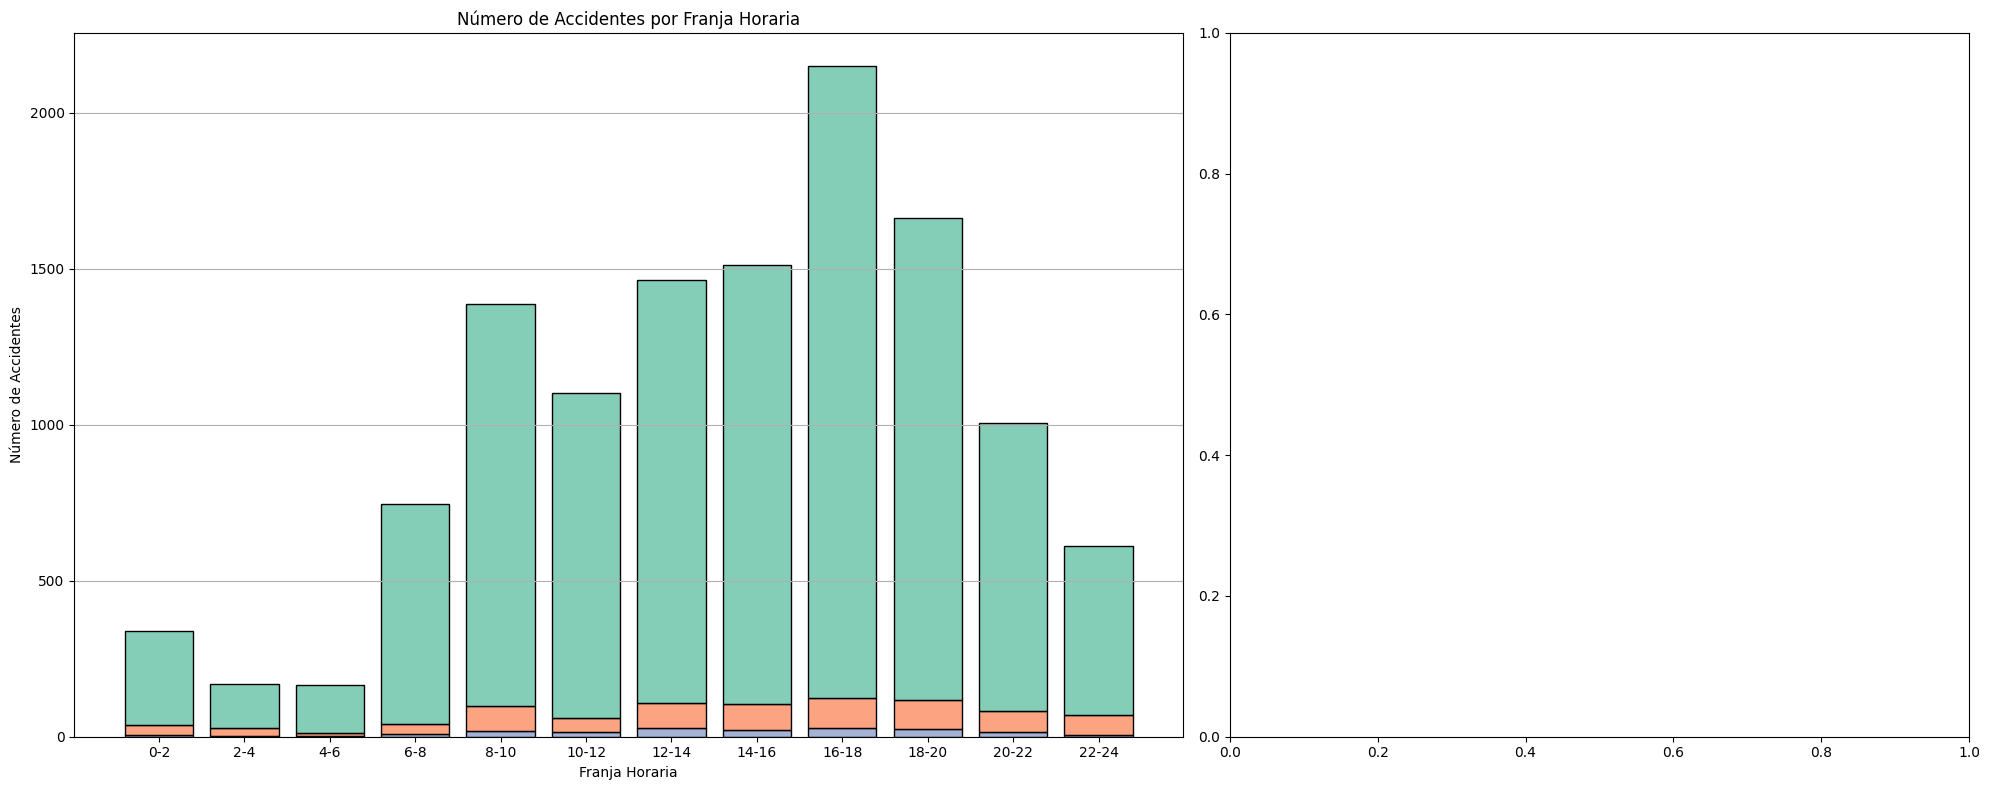

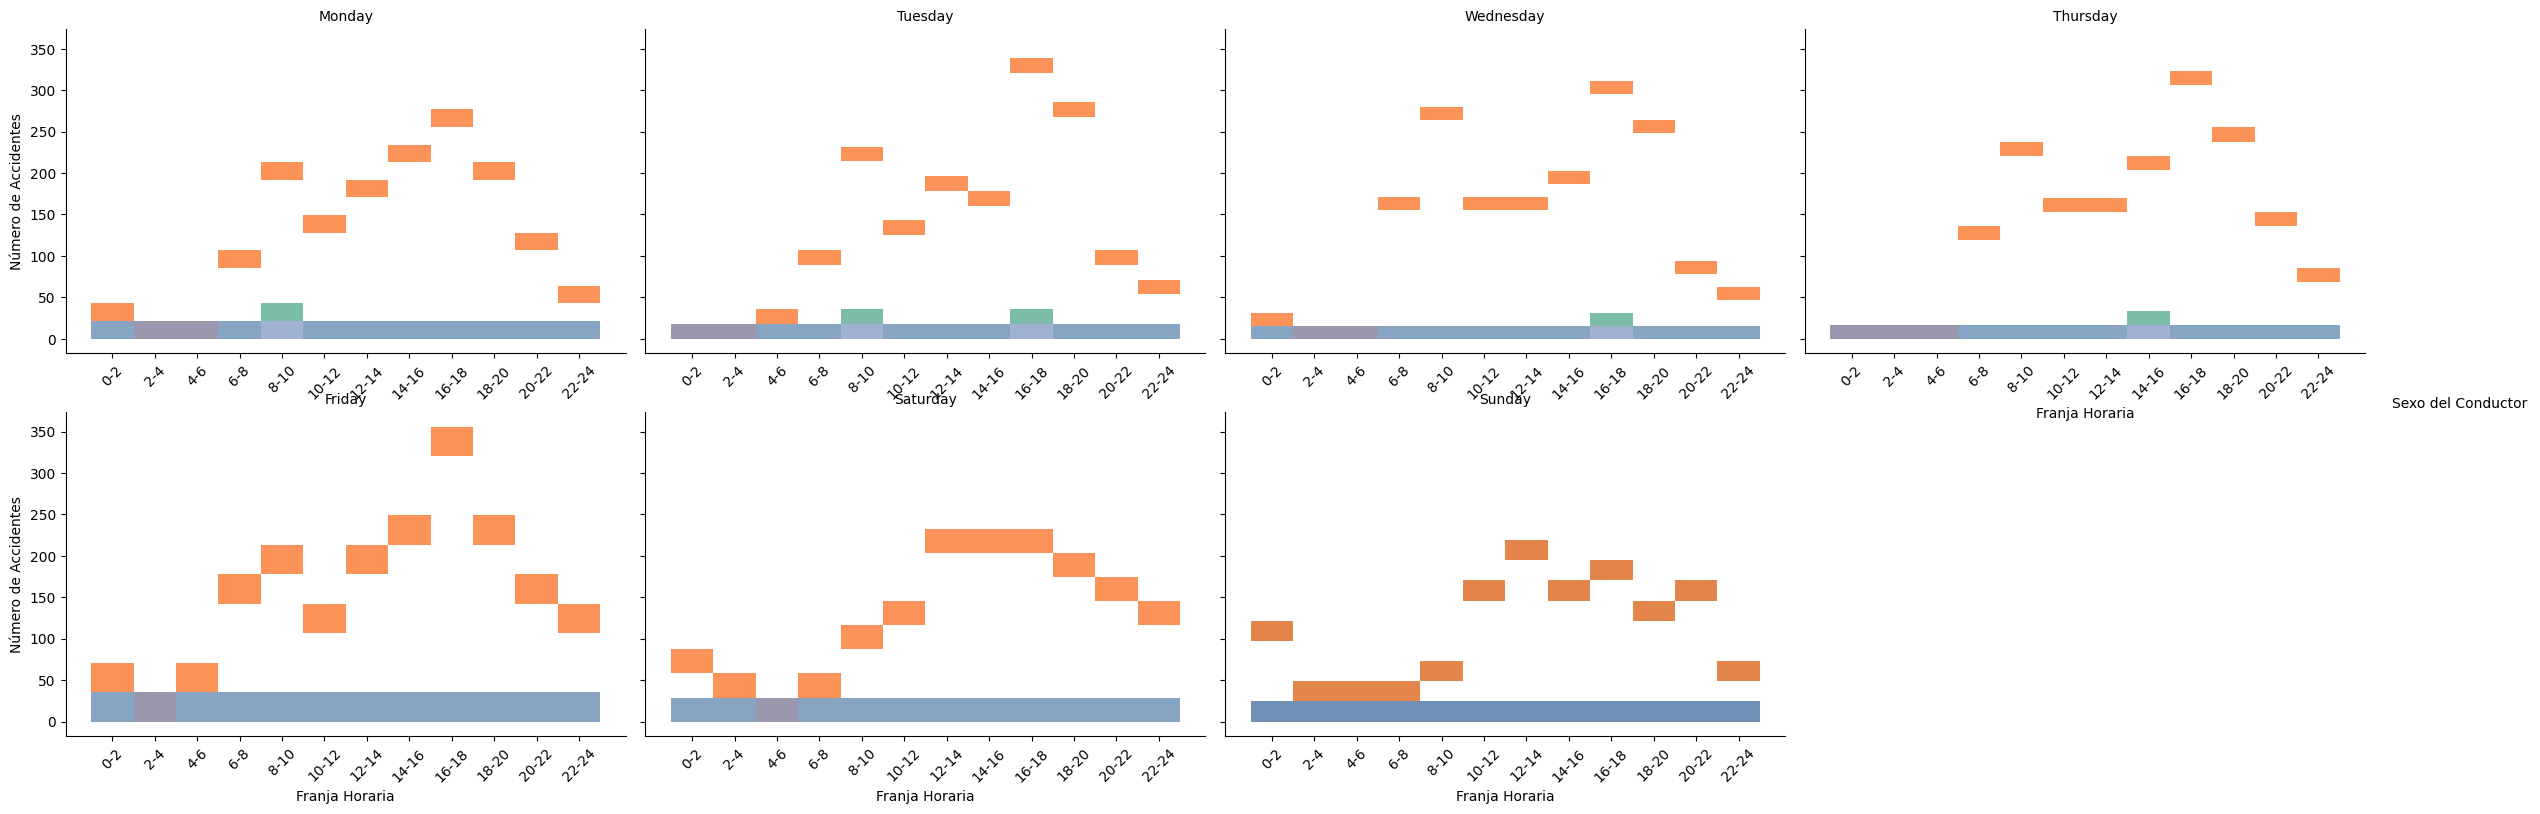

In [ ]:

bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16', '16-18', '18-20', '20-22', '22-24']
days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Verificar si la columna 'Time' ya está en horas
if df['Time'].dtype != 'int64':
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.hour

# Verificar si la columna 'Time_Bin' ya existe
if 'Time_Bin' not in df.columns:
    df['Time_Bin'] = pd.cut(df['Time'], bins=bins, labels=labels, right=False, include_lowest=True)

# Convertir la columna 'Day_of_week' en una categoría con el orden especificado
df['Day_of_week'] = pd.Categorical(df['Day_of_week'], categories=days_of_week_order, ordered=True)

# Contar el número de accidentes en cada franja horaria según el sexo del conductor y el día de la semana
accidents_per_bin = df.groupby(['Day_of_week', 'Time_Bin', 'Sex_of_driver']).size().reset_index(name='Accidents_Count')

# Crear gráficos en subplots
f, axs = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw=dict(width_ratios=[3, 2]))

# Crear el histograma de accidentes por franja horaria general
sns.histplot(data=df, x='Time_Bin', hue='Sex_of_driver', multiple='stack', palette='Set2', shrink=.8, alpha=.8, legend=False, ax=axs[0])
axs[0].set_title('Número de Accidentes por Franja Horaria')
axs[0].set_xlabel('Franja Horaria')
axs[0].set_ylabel('Número de Accidentes')
axs[0].grid(axis='y')

# Crear subplots para cada día de la semana
g = sns.FacetGrid(accidents_per_bin, col='Day_of_week', col_wrap=4, height=4, aspect=1.5, sharex=False)
g.map_dataframe(sns.histplot, x='Time_Bin', y='Accidents_Count', hue='Sex_of_driver', multiple='stack', palette='Set2', shrink=.8, alpha=.8)

g.set_axis_labels('Franja Horaria', 'Número de Accidentes')
g.set_titles('{col_name}')
g.add_legend(title='Sexo del Conductor')
g.set_xticklabels(rotation=45)

f.tight_layout()
plt.show()


<ipython-input-21-04a9fc63ea0c>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accidents_per_bin = df.groupby(['Day_of_week', 'Time_Bin', 'Sex_of_driver']).size().reset_index(name='Accidents_Count')
<ipython-input-21-04a9fc63ea0c>:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=accidents_per_bin, x='Day_of_week', y='Accidents_Count', hue='Sex_of_driver', ci=None, palette='Set2')


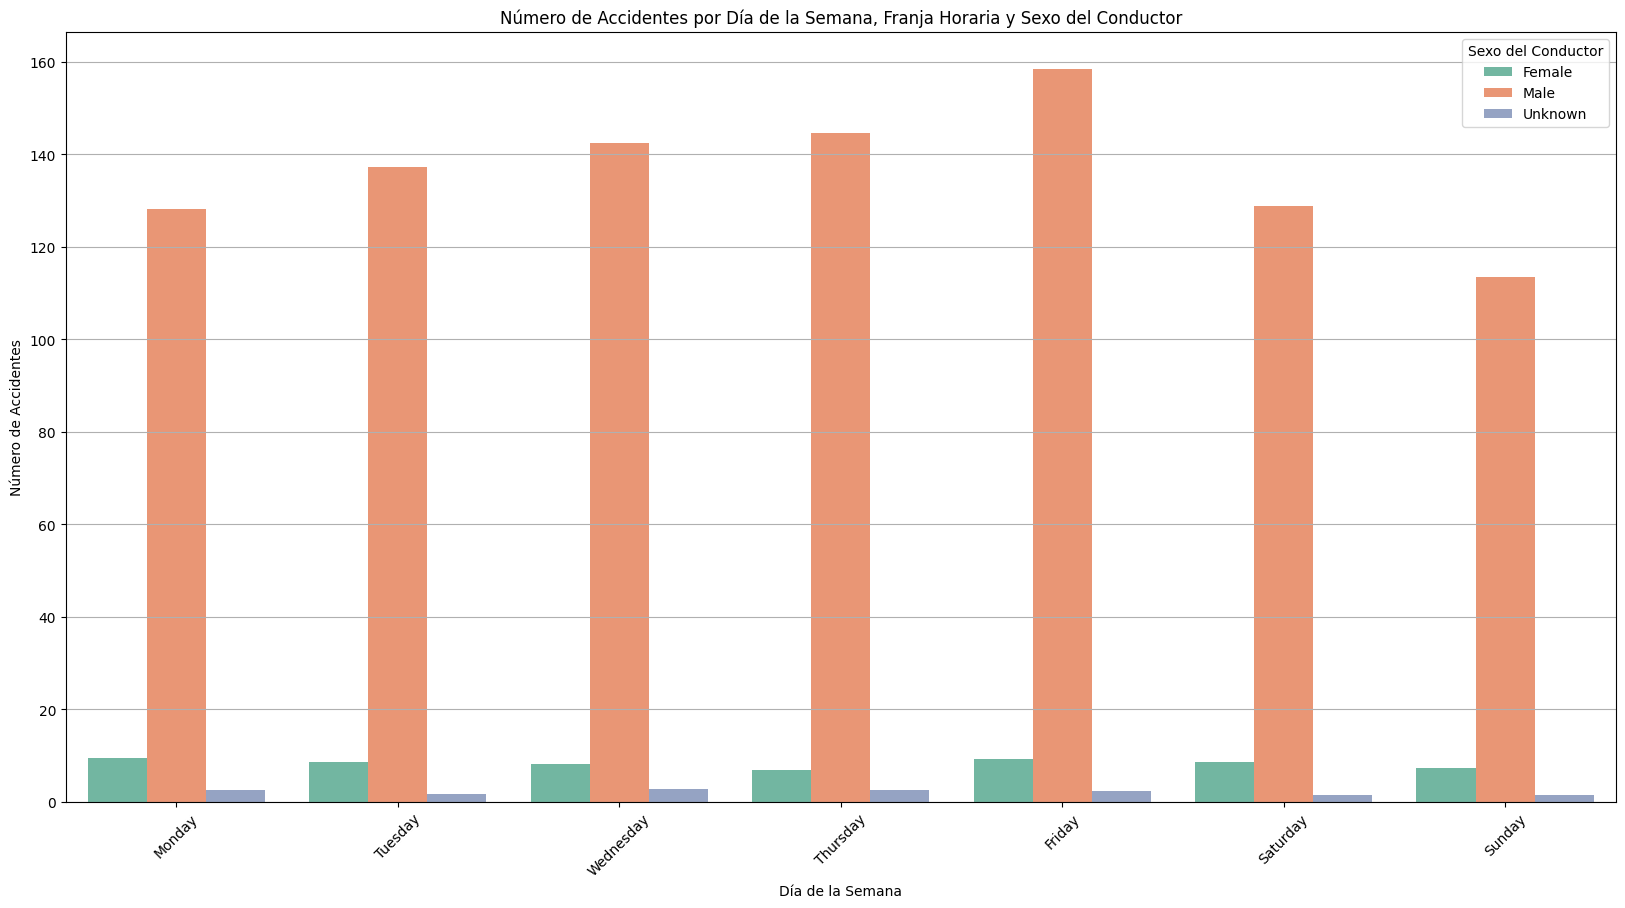

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que df ya está cargado y contiene los datos necesarios

bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16', '16-18', '18-20', '20-22', '22-24']
days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Verificar si la columna 'Time' ya está en horas
if df['Time'].dtype != 'int64':
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.hour

# Verificar si la columna 'Time_Bin' ya existe
if 'Time_Bin' not in df.columns:
    df['Time_Bin'] = pd.cut(df['Time'], bins=bins, labels=labels, right=False, include_lowest=True)

# Convertir la columna 'Day_of_week' en una categoría con el orden especificado
df['Day_of_week'] = pd.Categorical(df['Day_of_week'], categories=days_of_week_order, ordered=True)

# Contar el número de accidentes en cada franja horaria según el sexo del conductor y el día de la semana
accidents_per_bin = df.groupby(['Day_of_week', 'Time_Bin', 'Sex_of_driver']).size().reset_index(name='Accidents_Count')

# Crear un gráfico combinado de barras y líneas
plt.figure(figsize=(20, 10))

# Crear barras para los días de la semana
sns.barplot(data=accidents_per_bin, x='Day_of_week', y='Accidents_Count', hue='Sex_of_driver', ci=None, palette='Set2')

# Añadir líneas para las franjas horarias
#for sex in df['Sex_of_driver'].unique():
    #sns.lineplot(data=accidents_per_bin[accidents_per_bin['Sex_of_driver'] == sex], x='Day_of_week', y='Accidents_Count', hue='Time_Bin', palette='Set1', legend=False)

# Configurar el título y las etiquetas de los ejes
plt.title('Número de Accidentes por Día de la Semana, Franja Horaria y Sexo del Conductor')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Accidentes')
plt.legend(title='Sexo del Conductor')

# Mostrar el gráfico
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()


<ipython-input-22-702fca2f2c87>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accidents_per_bin = df.groupby(['Day_of_week', 'Time_Bin']).size().reset_index(name='Accidents_Count')


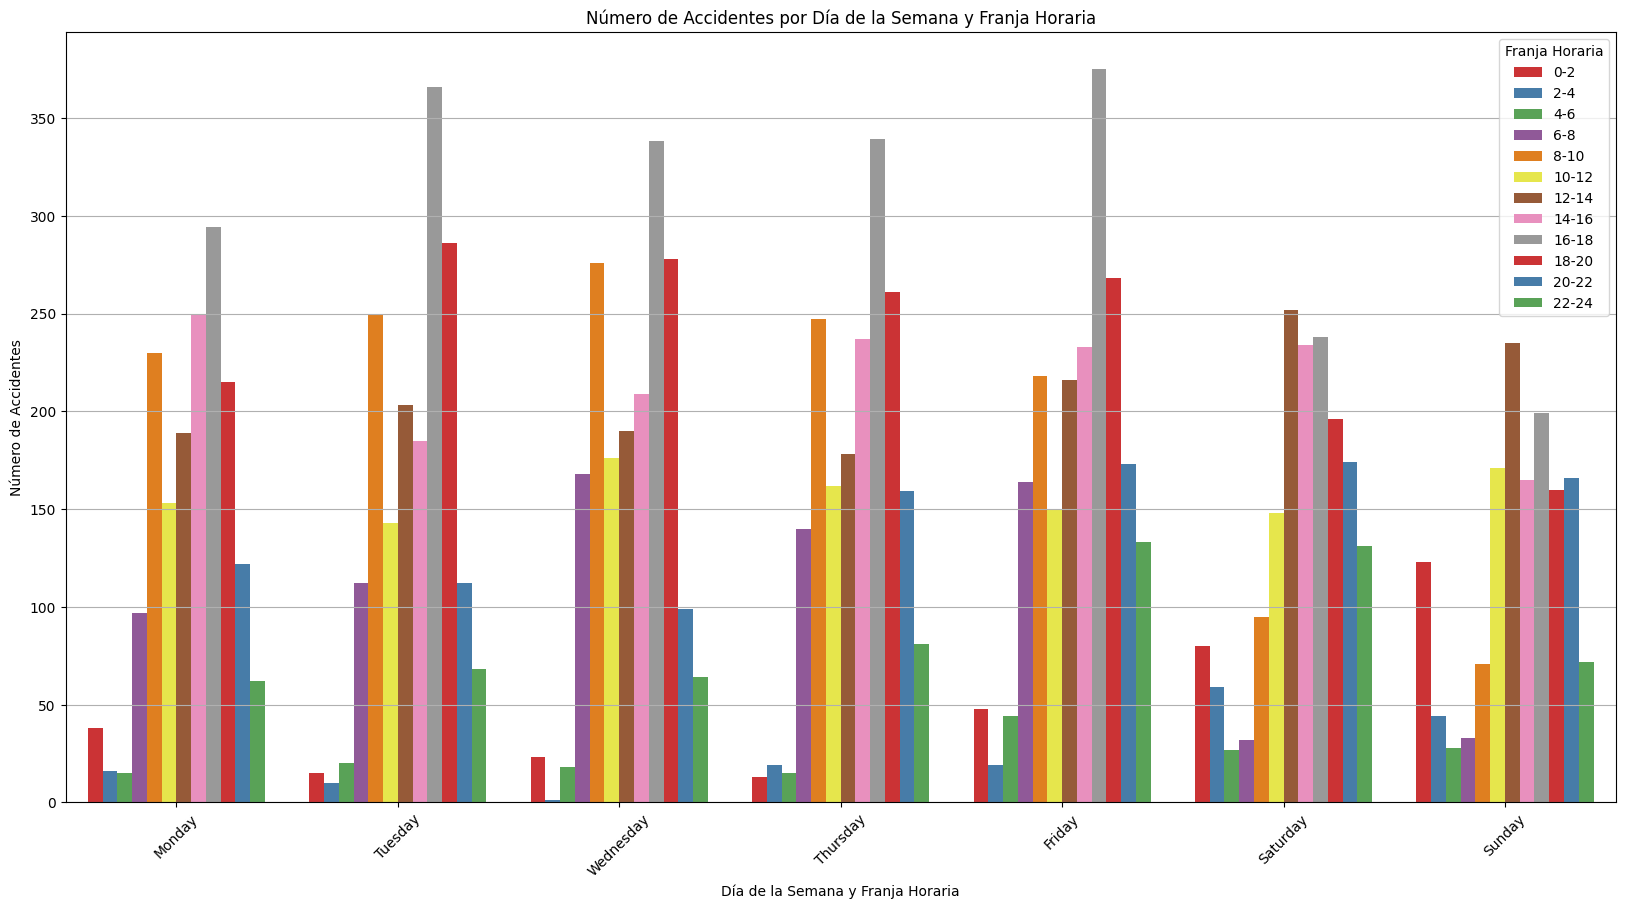

In [ ]:
bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16', '16-18', '18-20', '20-22', '22-24']
days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Verificar si la columna 'Time' ya está en horas
if df['Time'].dtype != 'int64':
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.hour

# Verificar si la columna 'Time_Bin' ya existe
if 'Time_Bin' not in df.columns:
    df['Time_Bin'] = pd.cut(df['Time'], bins=bins, labels=labels, right=False, include_lowest=True)

# Convertir la columna 'Day_of_week' en una categoría con el orden especificado
df['Day_of_week'] = pd.Categorical(df['Day_of_week'], categories=days_of_week_order, ordered=True)

# Contar el número de accidentes en cada franja horaria y día de la semana
accidents_per_bin = df.groupby(['Day_of_week', 'Time_Bin']).size().reset_index(name='Accidents_Count')

# Crear un gráfico de barras apiladas
plt.figure(figsize=(20, 10))
sns.barplot(data=accidents_per_bin, x='Day_of_week', y='Accidents_Count', hue='Time_Bin', palette='Set1')

# Configurar el título y las etiquetas de los ejes
plt.title('Número de Accidentes por Día de la Semana y Franja Horaria')
plt.xlabel('Día de la Semana y Franja Horaria')
plt.ylabel('Número de Accidentes')
plt.legend(title='Franja Horaria')

# Mostrar el gráfico
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()


<ipython-input-23-3ad209da9886>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)  # Rotar etiquetas del eje X en el segundo gráfico


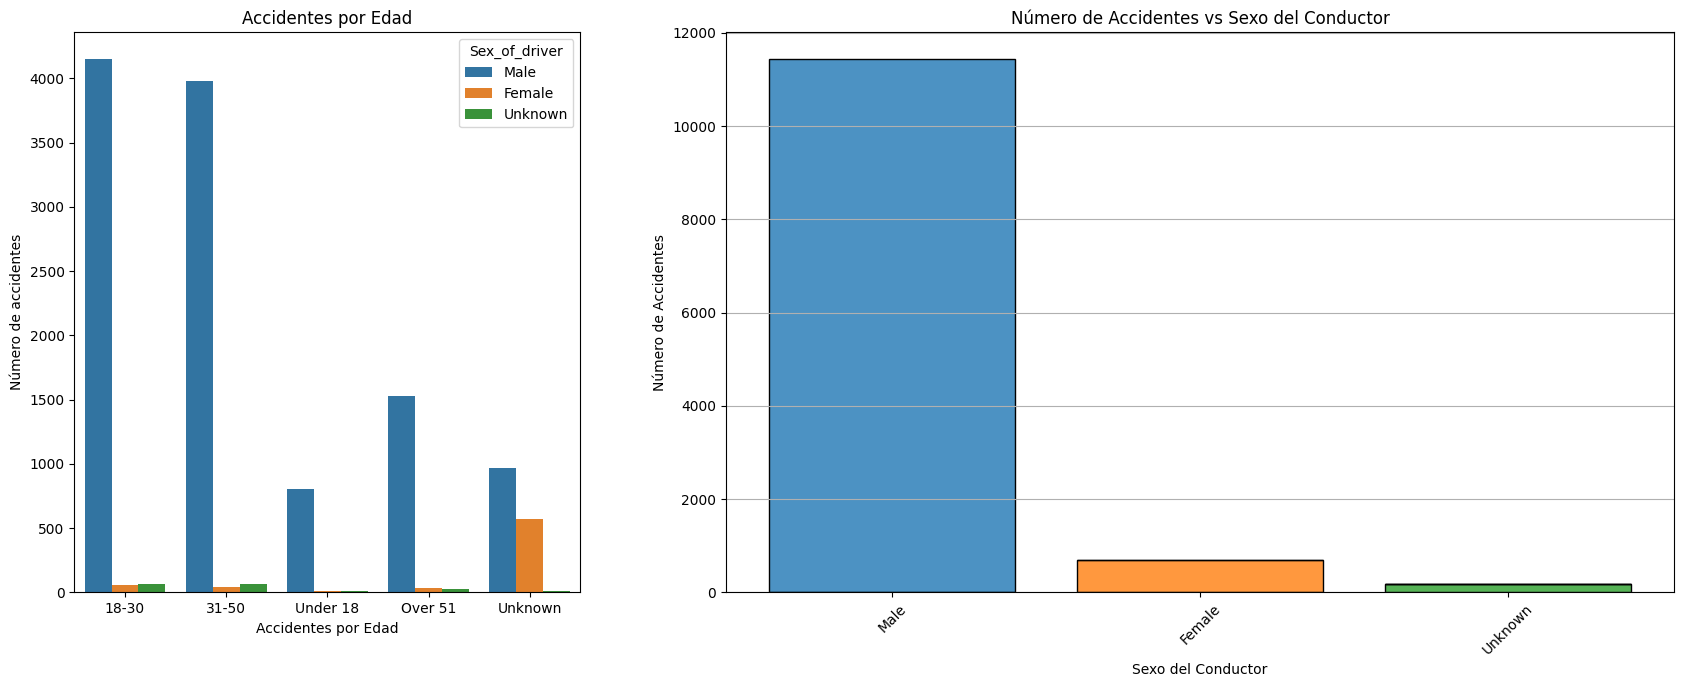

In [ ]:


f, axs = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw=dict(width_ratios=[8, 15]))

sns.countplot(data=df, x='Age_band_of_driver', hue='Sex_of_driver', ax=axs[0])
axs[0].set_title('Accidentes por Edad')
axs[0].set_xlabel('Accidentes por Edad')
axs[0].set_ylabel('Número de accidentes')

sns.histplot(data=df, x='Sex_of_driver', hue='Sex_of_driver', shrink=.8, alpha=.8, legend=False, ax=axs[1], multiple='stack')
axs[1].set_title('Número de Accidentes vs Sexo del Conductor')
axs[1].set_xlabel('Sexo del Conductor')
axs[1].set_ylabel('Número de Accidentes')
axs[1].grid(axis='y')

# Ajustes adicionales (opcionales)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)  # Rotar etiquetas del eje X en el segundo gráfico
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)  # Ajustar márgenes

plt.show()

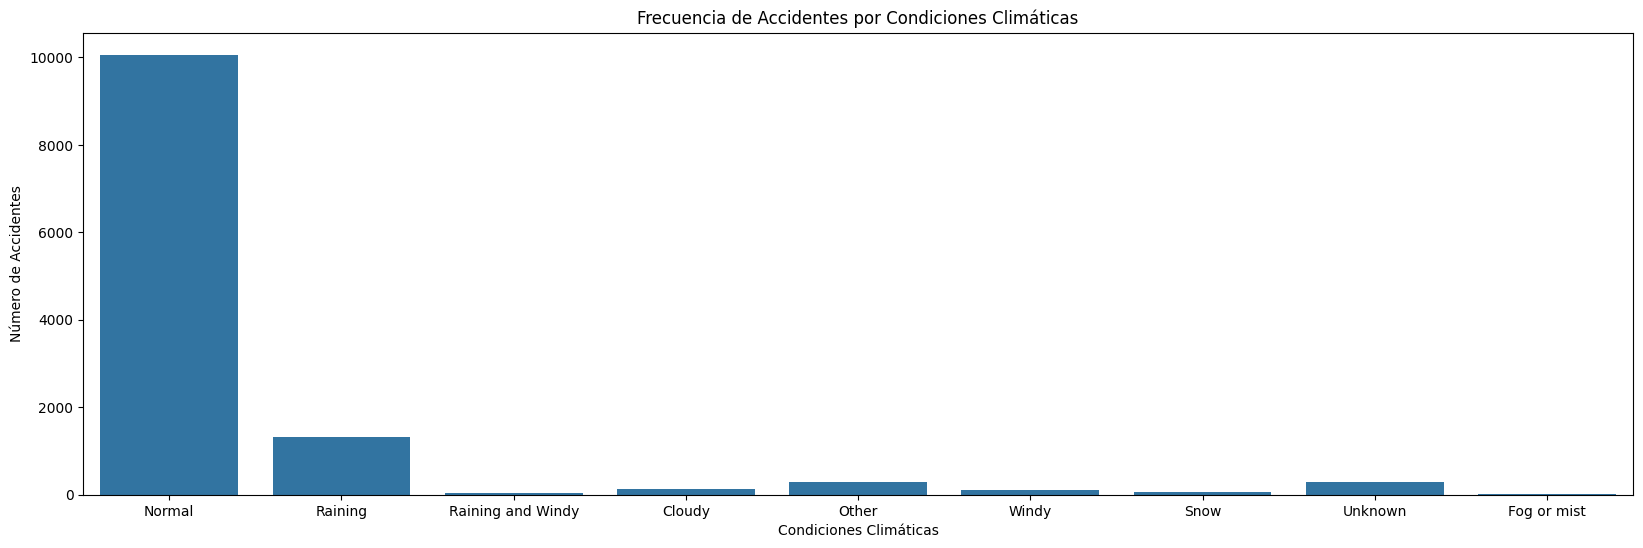

In [ ]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='Weather_conditions')
plt.title('Frecuencia de Accidentes por Condiciones Climáticas')
plt.xlabel('Condiciones Climáticas')
plt.ylabel('Número de Accidentes')
plt.show()

<ipython-input-25-194f1a55d3e3>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)  # Rotar etiquetas del eje X en el segundo gráfico


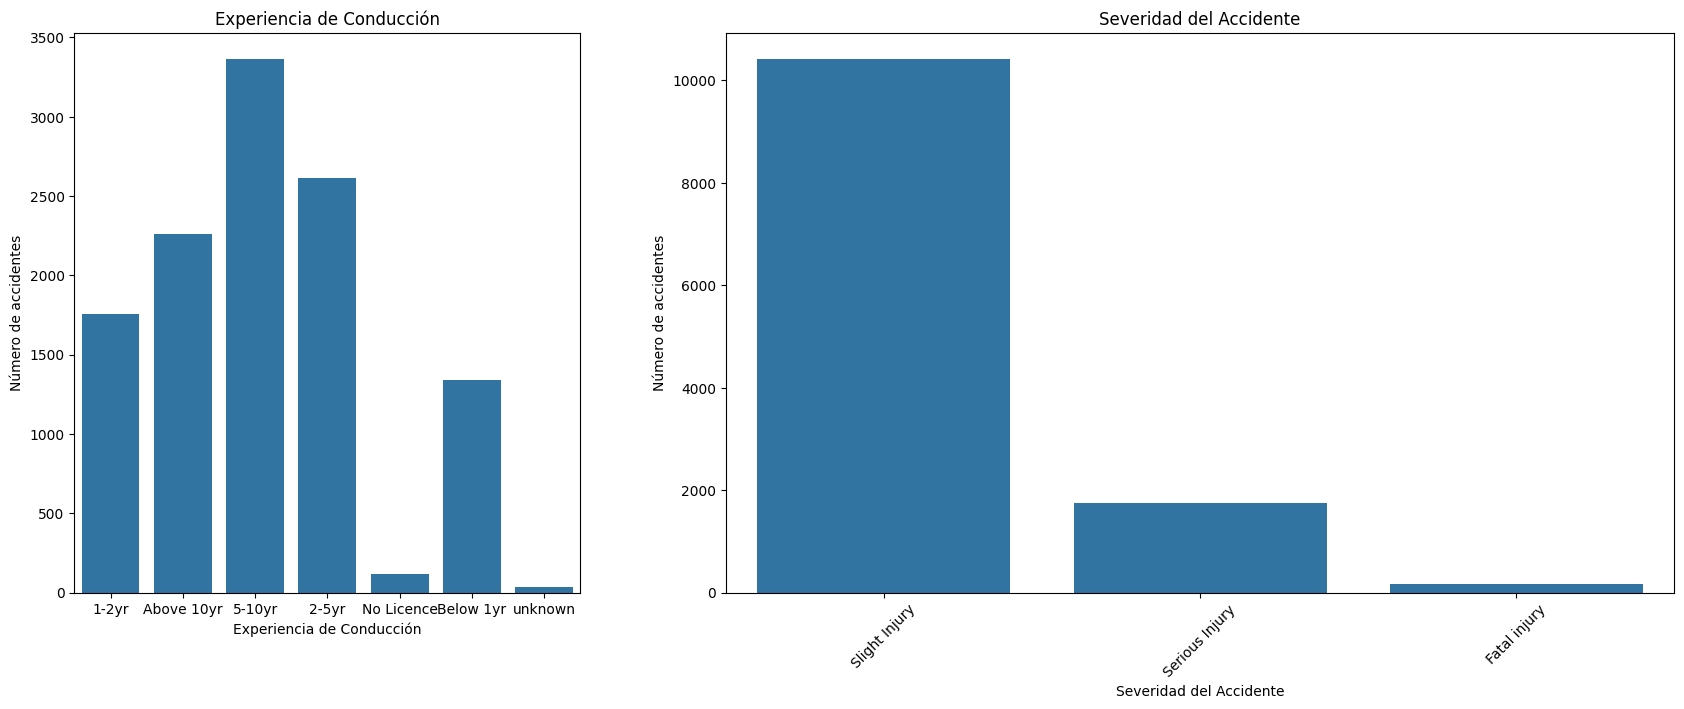

In [ ]:


f, axs = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw=dict(width_ratios=[8, 15]))

sns.countplot(data=df, x='Driving_experience', ax=axs[0])
axs[0].set_title('Experiencia de Conducción')
axs[0].set_xlabel('Experiencia de Conducción')
axs[0].set_ylabel('Número de accidentes')

sns.countplot(data=df, x='Accident_severity', ax=axs[1])
axs[1].set_title('Severidad del Accidente')
axs[1].set_xlabel('Severidad del Accidente')
axs[1].set_ylabel('Número de accidentes')

# Ajustes adicionales (opcionales)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)  # Rotar etiquetas del eje X en el segundo gráfico
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)  # Ajustar márgenes

plt.show()


<ipython-input-26-f4ab8bd96e49>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90, ha='right')  # Etiquetas verticales
<ipython-input-26-f4ab8bd96e49>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=0, ha='right')  # Etiquetas verticales


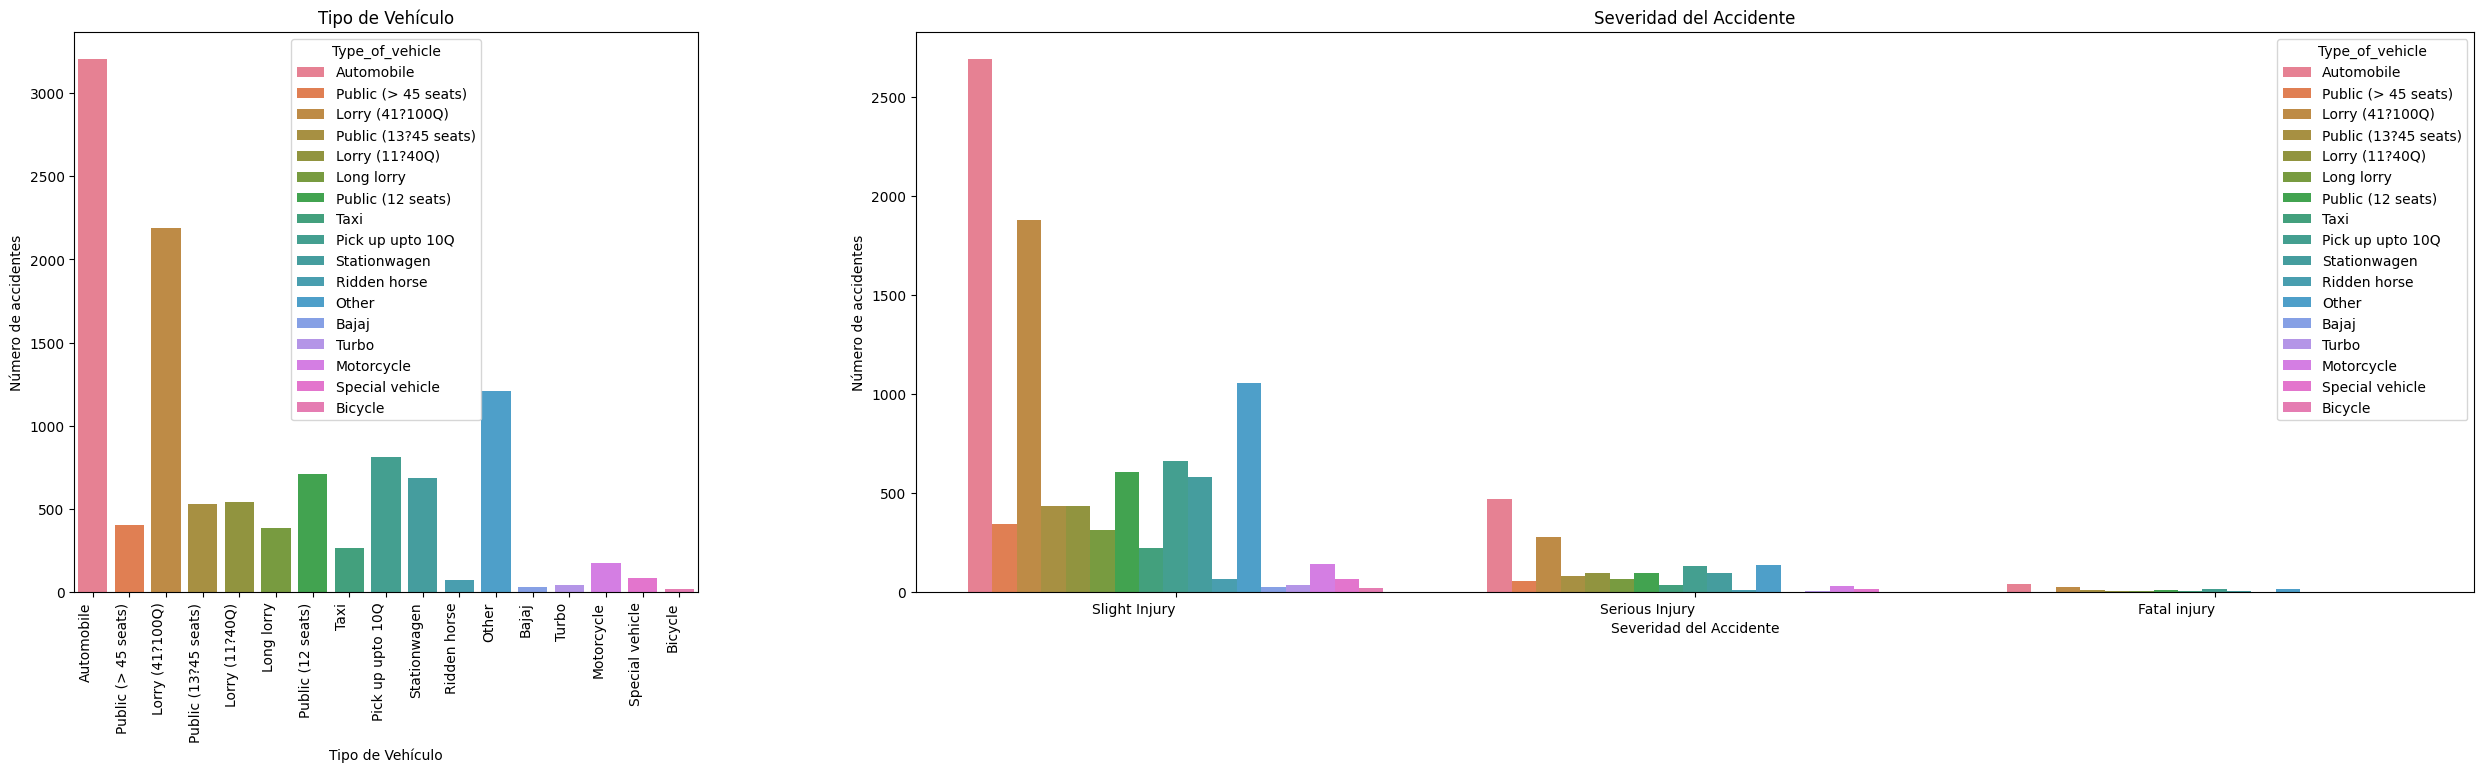

In [ ]:


f, axs = plt.subplots(1, 2, figsize=(30, 8), gridspec_kw=dict(width_ratios=[8, 20]))

# Gráfico de tipo de vehículo
sns.countplot(data=df, x='Type_of_vehicle', hue="Type_of_vehicle", ax=axs[0])
axs[0].set_title('Tipo de Vehículo')
axs[0].set_xlabel('Tipo de Vehículo')
axs[0].set_ylabel('Número de accidentes')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90, ha='right')  # Etiquetas verticales

# Gráfico de severidad del accidente
sns.countplot(data=df, x='Accident_severity', hue="Type_of_vehicle", ax=axs[1])
axs[1].set_title('Severidad del Accidente')
axs[1].set_xlabel('Severidad del Accidente')
axs[1].set_ylabel('Número de accidentes')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=0, ha='right')  # Etiquetas verticales

# Ajustes adicionales
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)  # Ajustar márgenes

# Mostrar gráfico
plt.show()


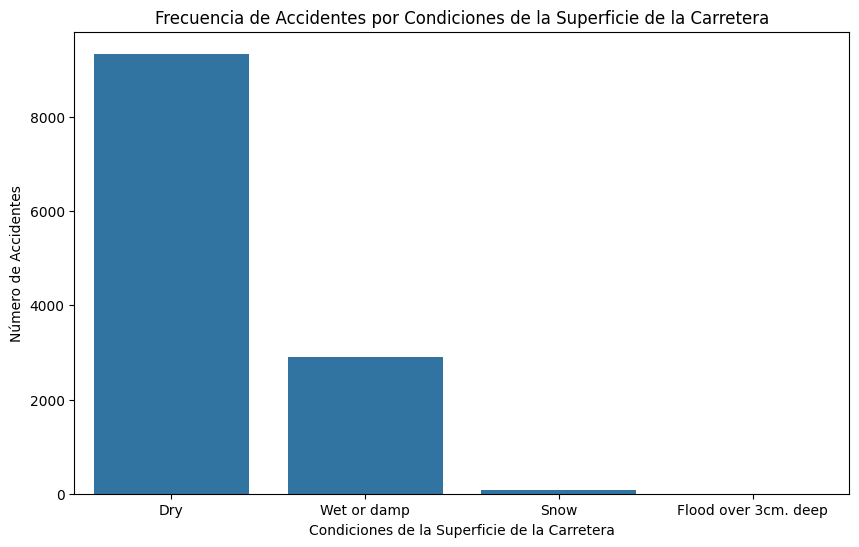

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Road_surface_conditions')
plt.title('Frecuencia de Accidentes por Condiciones de la Superficie de la Carretera')
plt.xlabel('Condiciones de la Superficie de la Carretera')
plt.ylabel('Número de Accidentes')
plt.show()


**Pregunta: ¿Hay alguna relación entre el tipo de accidente y el nivel de educación?**

## **5.1 Análisis de Correlación**

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Calcular la correlación
correlation_matrix = numeric_df.corr()
print(correlation_matrix['Number_of_casualties'].sort_values(ascending=False))



Number_of_casualties           1.000000
Number_of_vehicles_involved    0.213427
Time                                NaN
Name: Number_of_casualties, dtype: float64


In [ ]:
# Contar el número de accidentes por día de la semana
accidents_by_day = df.groupby('Day_of_week')['Number_of_casualties'].sum()
print(accidents_by_day)

# Contar el número de accidentes por tipo de vehículo
accidents_by_vehicle_type = df.groupby('Type_of_vehicle')['Number_of_casualties'].sum()
print(accidents_by_vehicle_type)




Day_of_week
Monday       2571
Tuesday      2588
Wednesday    2591
Thursday     2721
Friday       3144
Saturday     2746
Sunday       2706
Name: Number_of_casualties, dtype: int64
Type_of_vehicle
Automobile              4903
Bajaj                     50
Bicycle                   33
Long lorry               596
Lorry (11?40Q)           830
Lorry (41?100Q)         3392
Motorcycle               280
Other                   1918
Pick up upto 10Q        1282
Public (12 seats)       1060
Public (13?45 seats)     837
Public (> 45 seats)      600
Ridden horse             132
Special vehicle          124
Stationwagen            1054
Taxi                     413
Turbo                     76
Name: Number_of_casualties, dtype: int64


<ipython-input-29-84ae1eb98852>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accidents_by_day = df.groupby('Day_of_week')['Number_of_casualties'].sum()


In [ ]:
# Contar la severidad del accidente por condiciones meteorológicas
severity_by_weather = df.groupby('Weather_conditions')['Accident_severity'].value_counts()
print(severity_by_weather)


Weather_conditions  Accident_severity
Cloudy              Slight Injury         117
                    Serious Injury          8
Fog or mist         Slight Injury           9
                    Serious Injury          1
Normal              Slight Injury        8454
                    Serious Injury       1474
                    Fatal injury          135
Other               Slight Injury         268
                    Serious Injury         28
Raining             Slight Injury        1150
                    Serious Injury        158
                    Fatal injury           23
Raining and Windy   Slight Injury          38
                    Serious Injury          2
Snow                Slight Injury          56
                    Serious Injury          5
Unknown             Slight Injury         241
                    Serious Injury         51
Windy               Slight Injury          82
                    Serious Injury         16
Name: count, dtype: int64


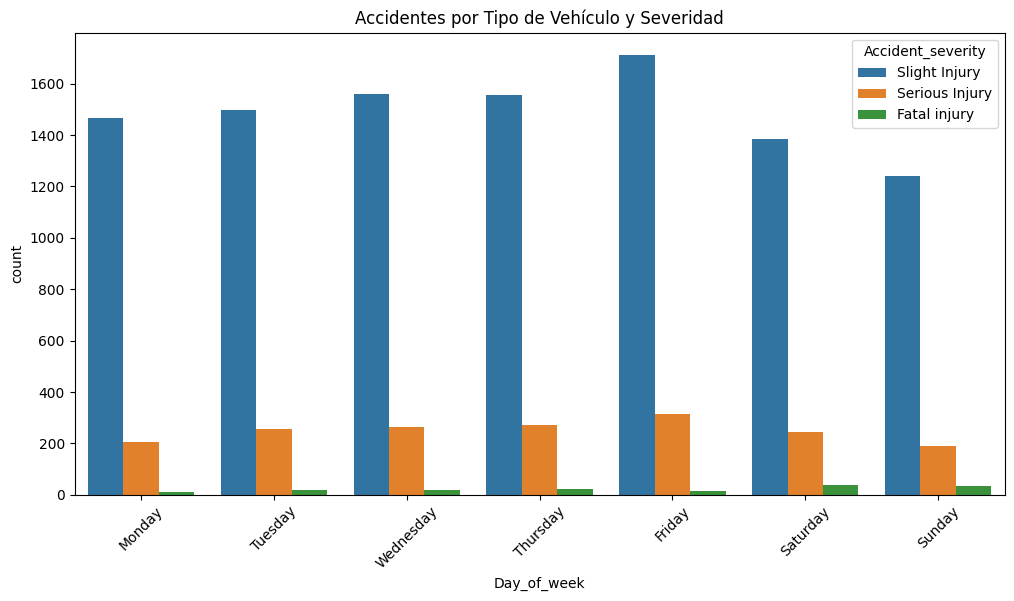

In [ ]:
days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convertir la columna 'Day_of_week' en una categoría con el orden especificado
df['Day_of_week'] = pd.Categorical(df['Day_of_week'], categories=days_of_week_order, ordered=True)

# Gráfico de barras de accidentes por tipo de vehículo
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Day_of_week', hue='Accident_severity')
plt.title('Accidentes por Tipo de Vehículo y Severidad')
plt.xticks(rotation=45)
plt.show()


<ipython-input-32-1bbde310d0da>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1 = df.groupby(['Time_Bin', 'Day_of_week','Light_conditions']).size().reset_index(name='Count')
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


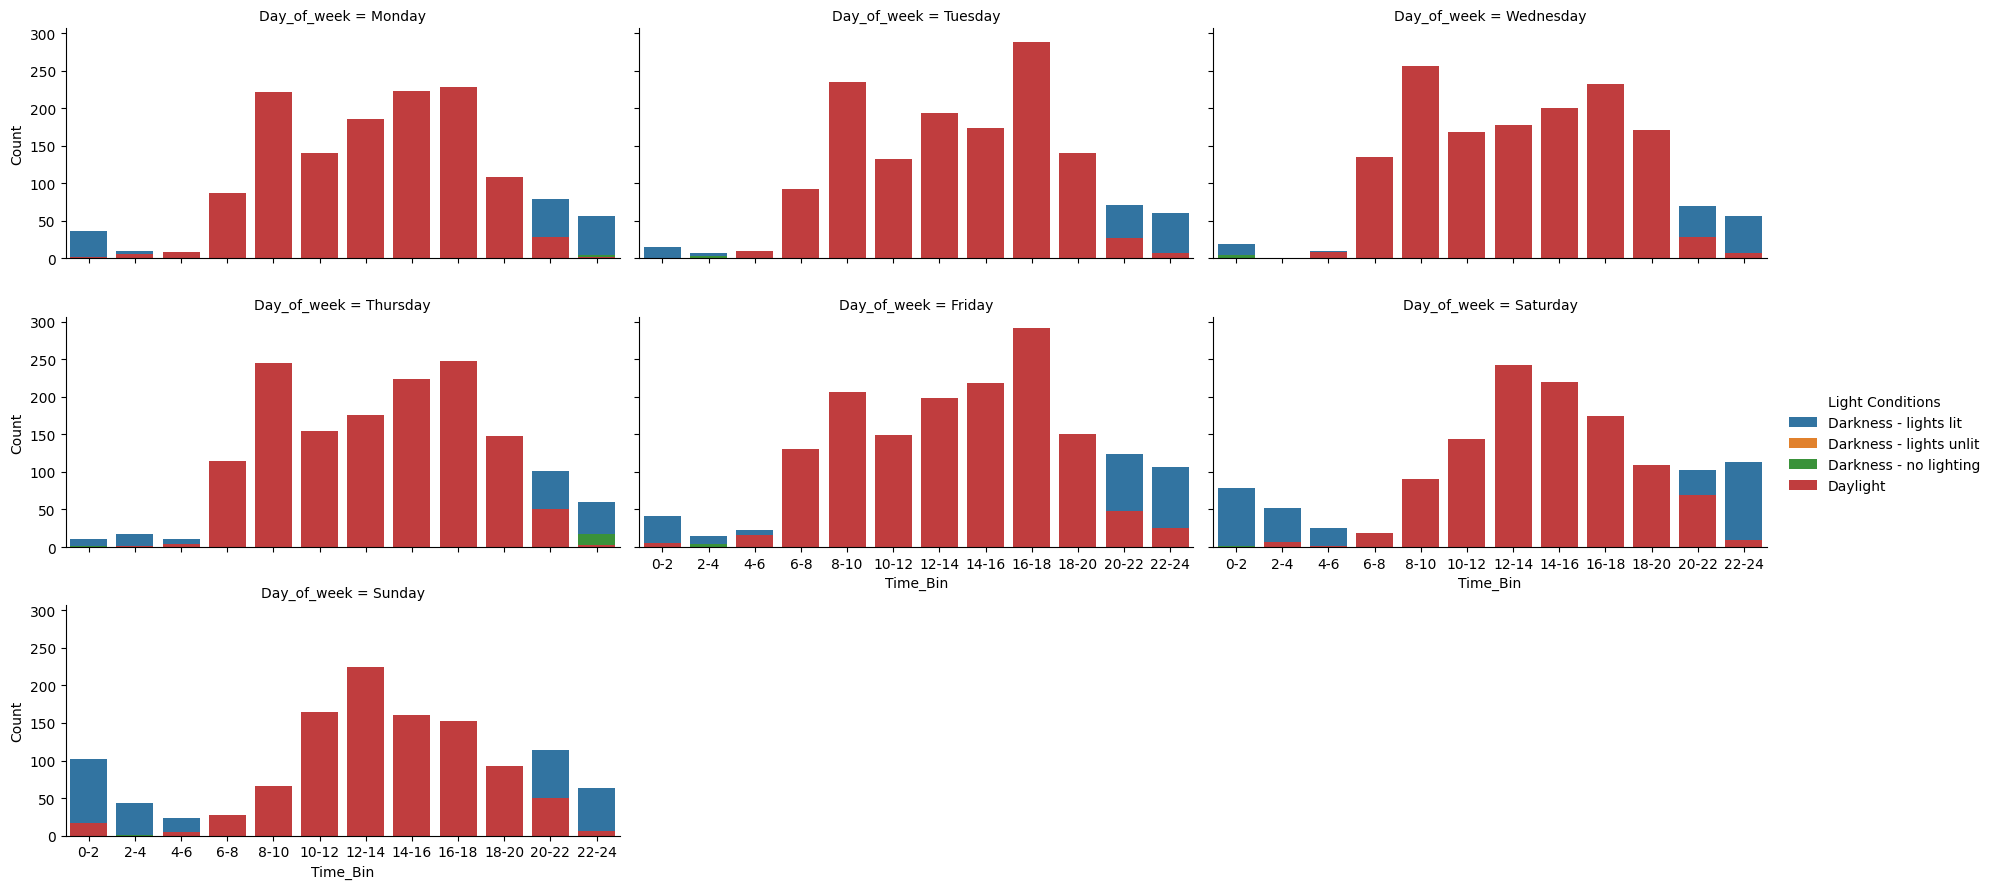

In [ ]:
bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16', '16-18', '18-20', '20-22', '22-24']
days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Verificar si la columna 'Time' ya está en horas
if df['Time'].dtype != 'int64':
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.hour

# Verificar si la columna 'Time_Bin' ya existe
if 'Time_Bin' not in df.columns:
    df['Time_Bin'] = pd.cut(df['Time'], bins=bins, labels=labels, right=False, include_lowest=True)

# Agrupar por 'Time_Bin' y 'Number_of_casualties', luego convertir en DataFrame
df1 = df.groupby(['Time_Bin', 'Day_of_week','Light_conditions']).size().reset_index(name='Count')

# Mostrar el DataFrame resultante
df1


chart=  sns.FacetGrid(df1, col='Day_of_week',hue='Light_conditions', margin_titles=True, col_wrap=3, aspect=2, row_order=df['Light_conditions'].unique)
chart.map(sns.barplot,'Time_Bin', 'Count')
chart.add_legend(title='Light Conditions')

# Mostrar el gráfico
plt.show()


In [ ]:

df3=pd.read_csv("RTADataset.csv")
# Imprimir leyendas para las variables especificadas
print("Leyendas para las variables:")
for col in ['Type_of_collision', 'Weather_conditions', 'Light_conditions',
             'Road_surface_conditions', 'Area_accident_occured']:
    unique_values = df3[col].unique()
    print(f"\n**{col}**: {unique_values}")


Leyendas para las variables:

**Type_of_collision**: ['Collision with roadside-parked vehicles'
 'Vehicle with vehicle collision' 'Collision with roadside objects'
 'Collision with animals' 'Other' 'Rollover' 'Fall from vehicles'
 'Collision with pedestrians' 'With Train' 'Unknown' nan]

**Weather_conditions**: ['Normal' 'Raining' 'Raining and Windy' 'Cloudy' 'Other' 'Windy' 'Snow'
 'Unknown' 'Fog or mist']

**Light_conditions**: ['Daylight' 'Darkness - lights lit' 'Darkness - no lighting'
 'Darkness - lights unlit']

**Road_surface_conditions**: ['Dry' 'Wet or damp' 'Snow' 'Flood over 3cm. deep']

**Area_accident_occured**: ['Residential areas' 'Office areas' '  Recreational areas'
 ' Industrial areas' nan 'Other' ' Church areas' '  Market areas'
 'Unknown' 'Rural village areas' ' Outside rural areas' ' Hospital areas'
 'School areas' 'Rural village areasOffice areas' 'Recreational areas']


## **5.2 Distribución de variables categóricas**

<ipython-input-34-2ecf40054341>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df3, ax=axs[row][pos], palette='pastel')
<ipython-input-34-2ecf40054341>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df3, ax=axs[row][pos], palette='pastel')
<ipython-input-34-2ecf40054341>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df3, ax=axs[row][pos], palette='pastel')
<ipython-input-34-2ecf40054341>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.1

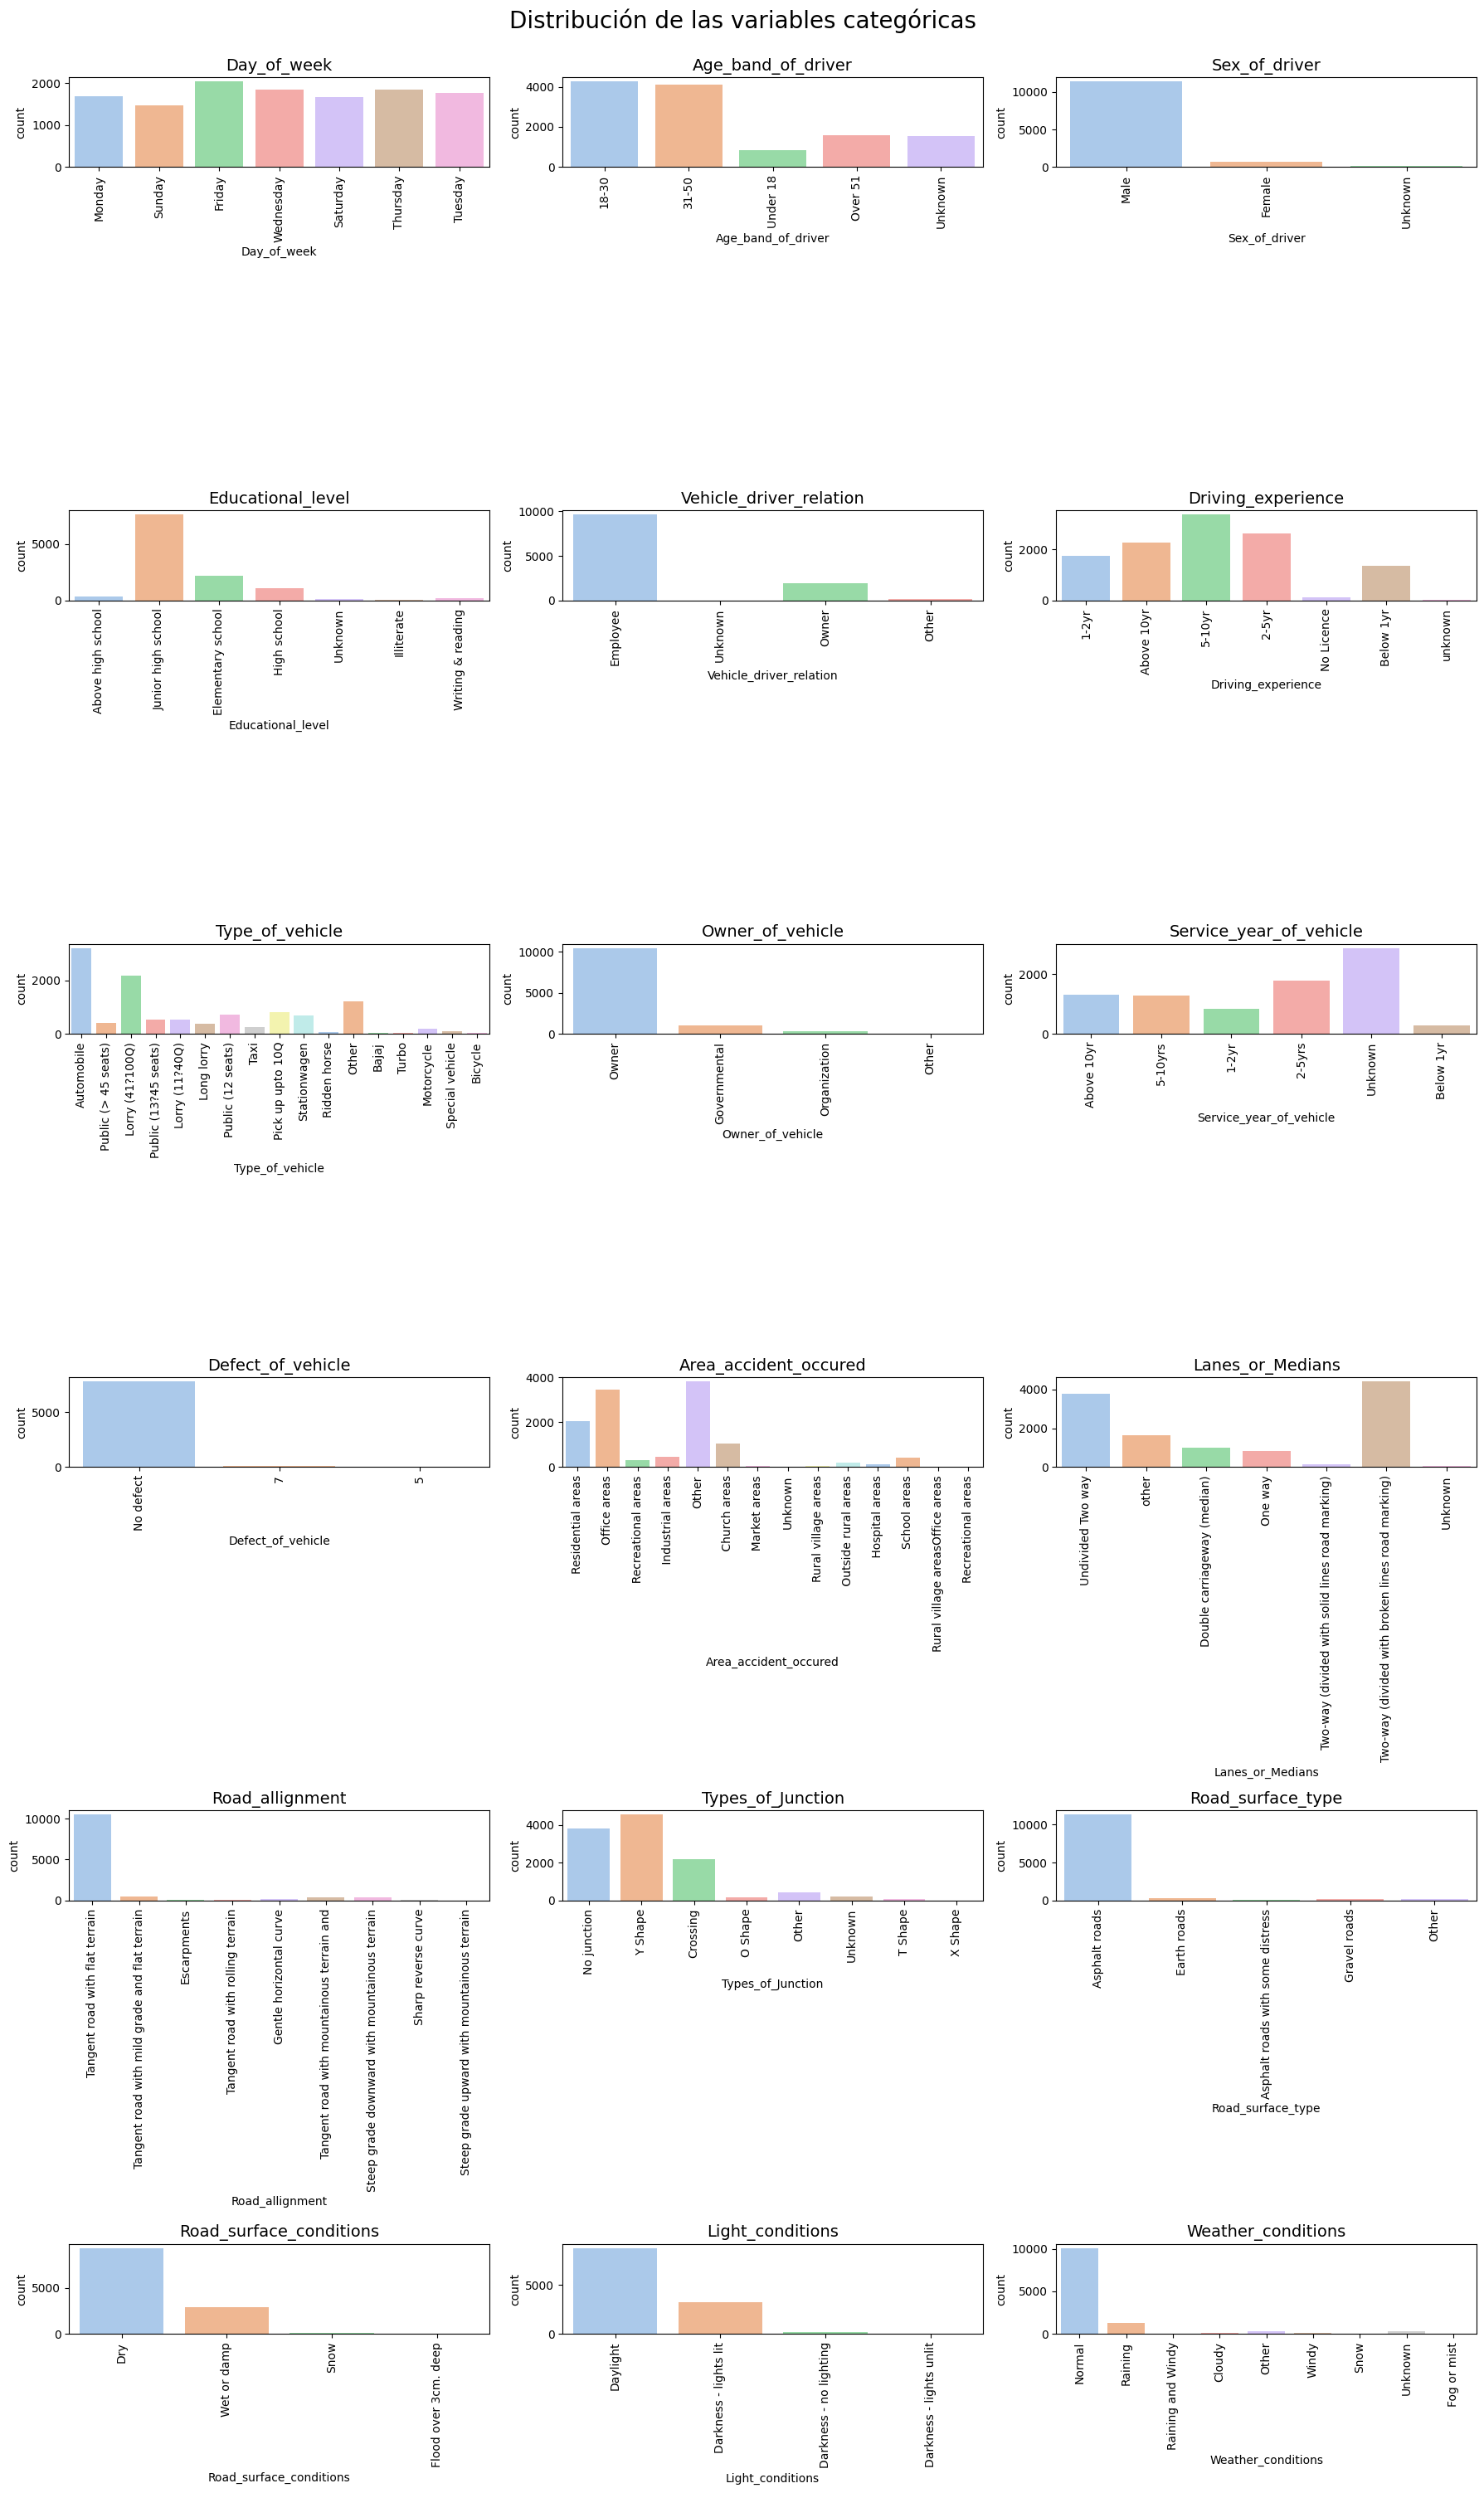

In [ ]:
#Parte 1/2

fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(18, 30))
fig.suptitle('Distribución de las variables categóricas', fontsize=20, y=1.0)

# Variables categóricas
cat_cols = [ 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions']

# Iterar sobre las columnas categóricas
for i, col in enumerate(cat_cols):
    row = i // 3
    pos = i % 3
    if row<6:
        sns.countplot(x=col, data=df3, ax=axs[row][pos], palette='pastel')
        axs[row][pos].set_title(col, fontsize=14)
        axs[row][pos].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()




<ipython-input-35-b39791e91867>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df3, ax=axs[row][pos], palette='pastel')
<ipython-input-35-b39791e91867>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df3, ax=axs[row][pos], palette='pastel')
<ipython-input-35-b39791e91867>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df3, ax=axs[row][pos], palette='pastel')
<ipython-input-35-b39791e91867>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.1

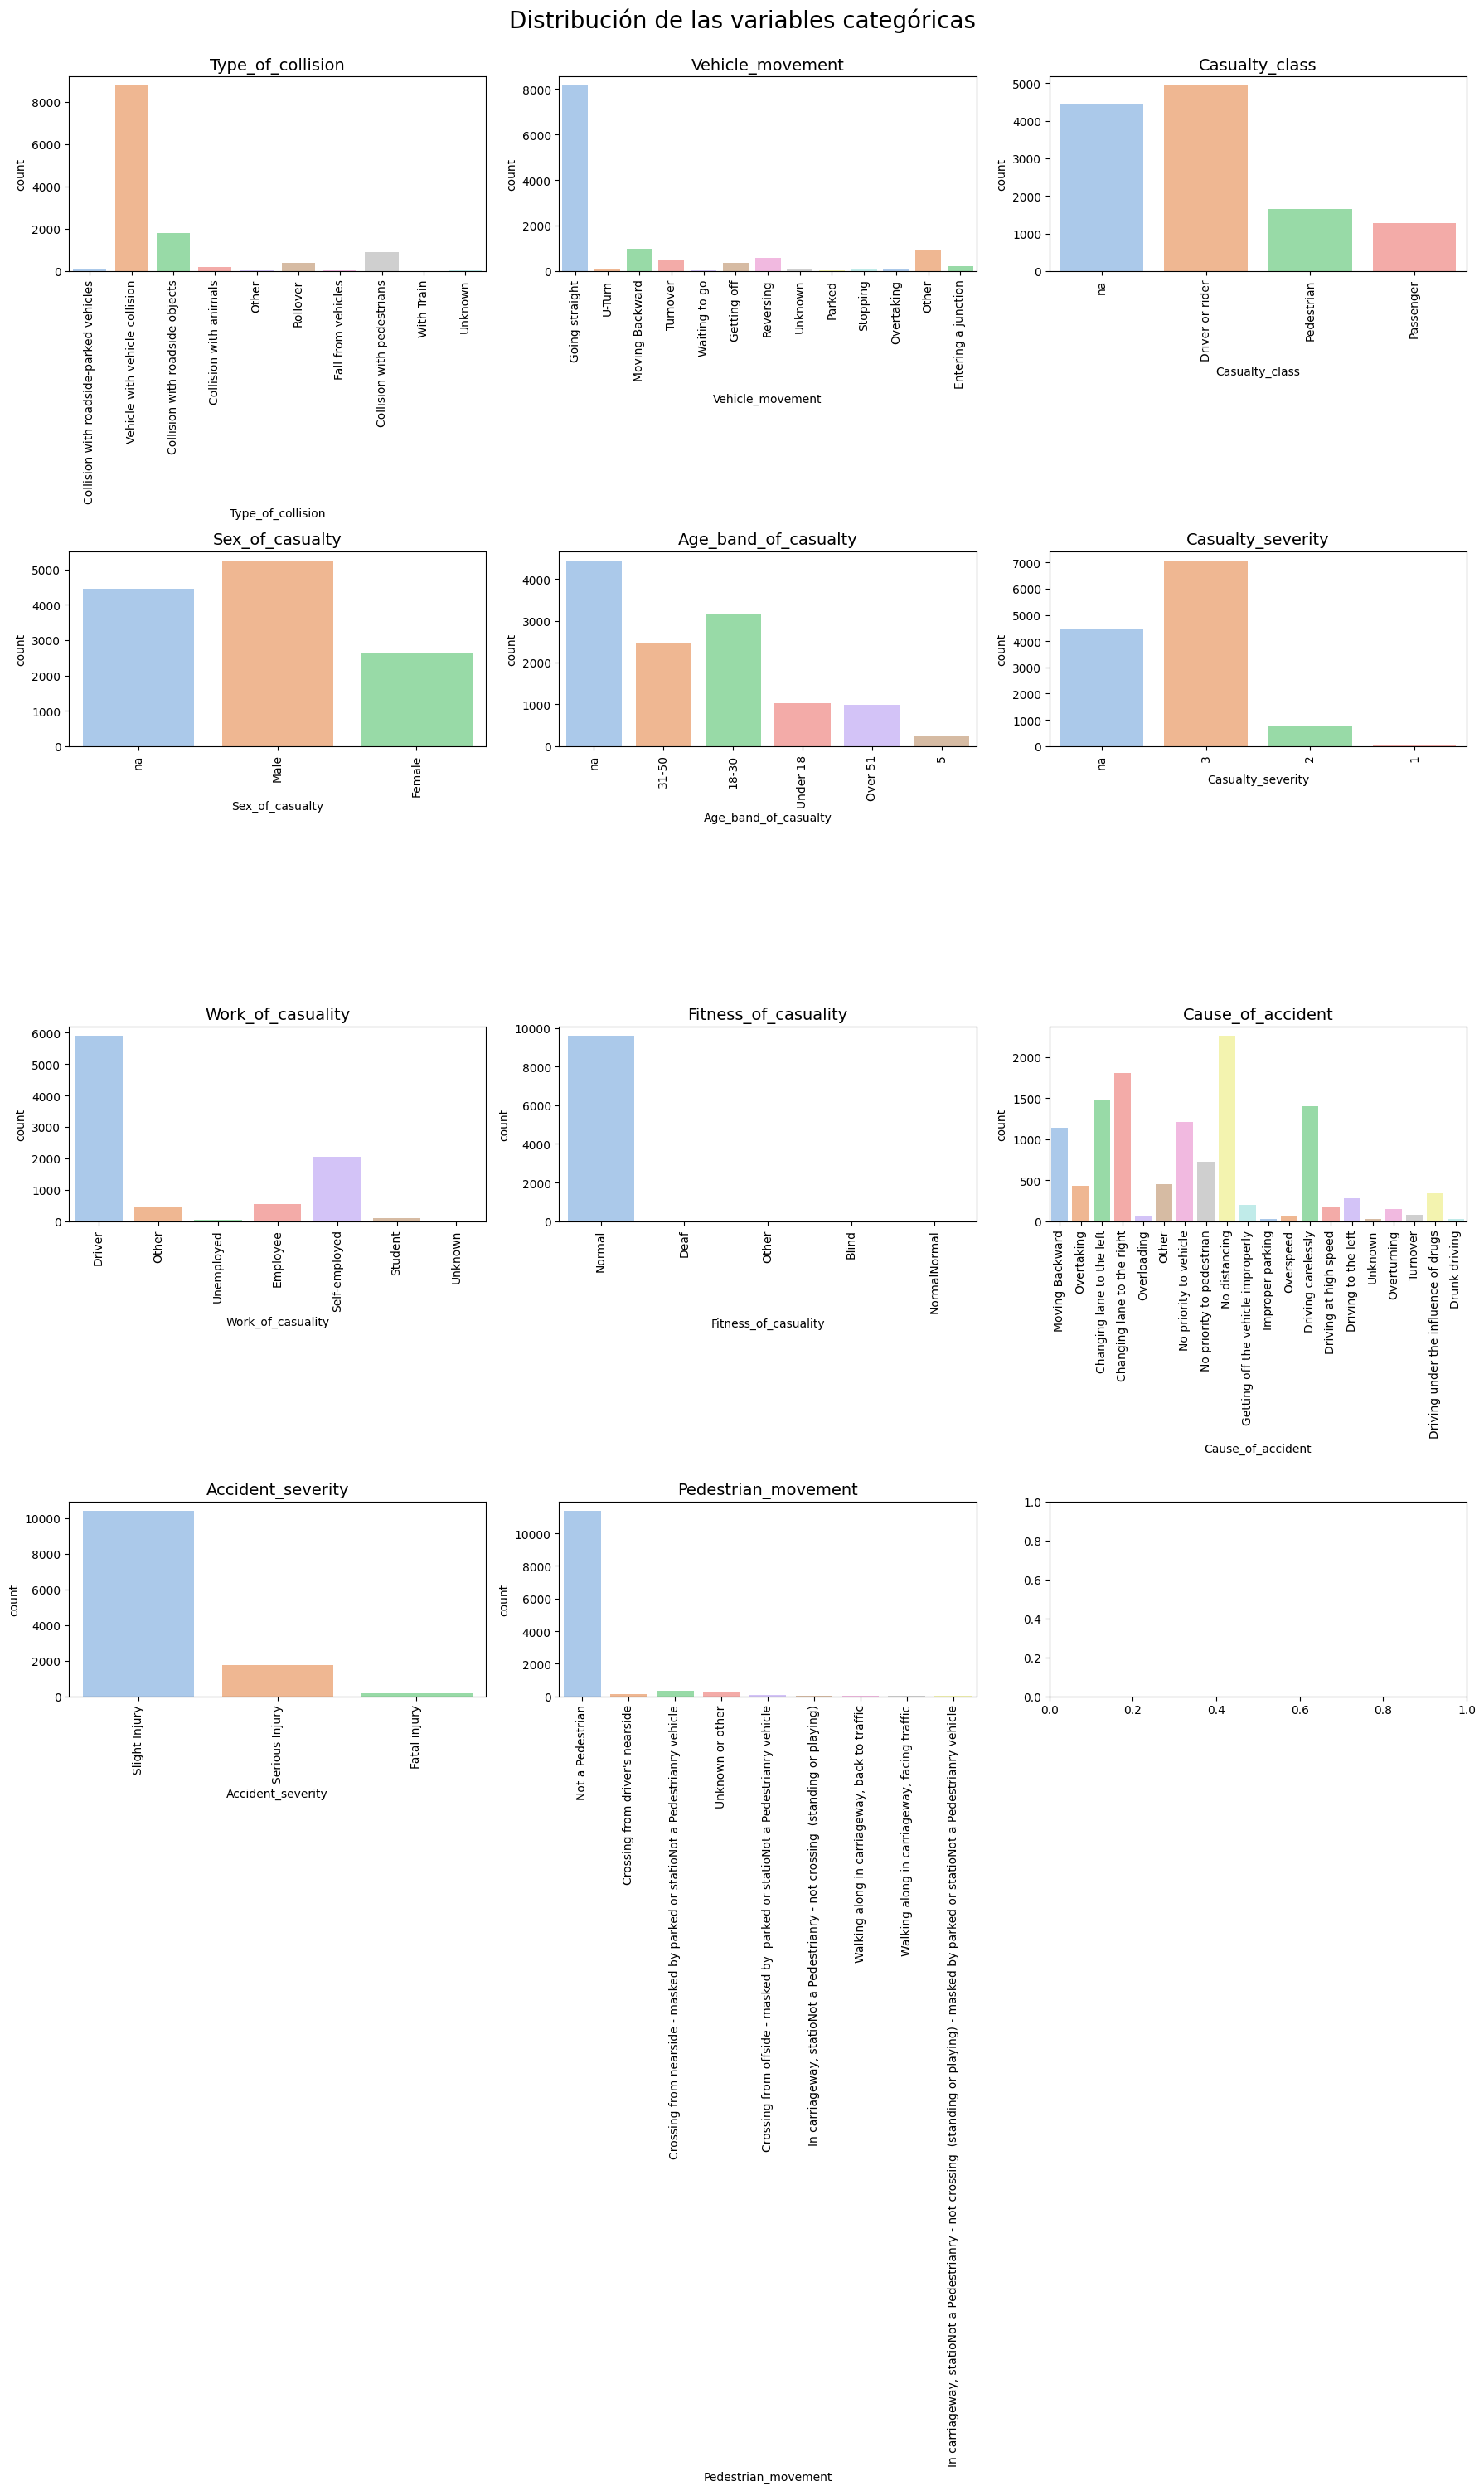

In [ ]:
#Parte 2/2

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(18, 30))
fig.suptitle('Distribución de las variables categóricas', fontsize=20, y=1.0)

# Variables categóricas
cat_cols = ['Type_of_collision', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality',
       'Cause_of_accident', 'Accident_severity','Pedestrian_movement']

# Iterar sobre las columnas categóricas
for i, col in enumerate(cat_cols):
    row = i // 3
    pos = i % 3
    if row<6:
        sns.countplot(x=col, data=df3, ax=axs[row][pos], palette='pastel')
        axs[row][pos].set_title(col, fontsize=14)
        axs[row][pos].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()



## **5.3 Tasa de accidentes graves**

In [ ]:
# Asegurarse de que los valores en 'Accident_severity' estén en minúsculas y sin espacios
df_accident = df['Accident_severity'].str.strip().str.lower()

# Contar accidentes totales
total_accidentes = df_accident.count()

# Imprimir el total de accidentes
print('Total de accidentes:', total_accidentes)

# Contar accidentes graves (asumiendo que 'serious injury' representa los accidentes graves)
accidentes_graves = df_accident[df_accident == 'serious injury'].count()

# Imprimir el total de accidentes graves
print('Total de accidentes graves:', accidentes_graves)

# Calcular la tasa de accidentes graves
accidentes_graves_rate = accidentes_graves / total_accidentes

# Imprimir la tasa de accidentes graves
print('Tasa de accidentes graves: {:.2%}'.format(accidentes_graves_rate))





Total de accidentes: 12316
Total de accidentes graves: 1743
Tasa de accidentes graves: 14.15%


## **5.4 Análisis específicos para responder a las preguntas de investigación**

---

1. ¿Cuáles son los factores más importantes que contribuyen a la cantidad de accidentes de tráfico?
El análisis muestra que varios factores influyen significativamente en la cantidad de accidentes de tráfico. Entre ellos, destacan la falta de distancia entre vehículos, los cruces de calles o bifurcaciones, y los cambios de carril. Estos factores están relacionados con errores de juicio o comportamiento imprudente por parte de los conductores, lo que sugiere la necesidad de una mayor educación y concienciación sobre la conducción segura. Además, el tipo de colisión y las condiciones de la superficie de la carretera también juegan un papel importante en la gravedad de los accidentes.

2. ¿Existen patrones temporales (por ejemplo, hora del día, día de la semana) que influyen en la frecuencia de los accidentes?
Sí, se identificaron patrones temporales claros en la ocurrencia de accidentes. Los datos revelan que los viernes, especialmente entre las 16:00 y las 18:00 horas, se registra la mayor cantidad de accidentes. Este patrón puede estar relacionado con el aumento del tráfico al final de la semana laboral y la posible fatiga de los conductores. Sin embargo, las condiciones climáticas y temporales, como la luz o el clima, no parecen ser factores determinantes en la frecuencia de los accidentes.

3. ¿Qué impacto tienen las características del conductor (edad, sexo, experiencia) en la frecuencia de los accidentes?
Las características del conductor tienen un impacto significativo en la frecuencia de los accidentes. Los hombres están involucrados en un 93% de los accidentes analizados, lo que sugiere una mayor predisposición o exposición al riesgo en comparación con las mujeres. Además, los conductores jóvenes, especialmente aquellos entre 18 y 30 años, son los más propensos a estar involucrados en accidentes. Este grupo de edad, que generalmente tiene entre 5 a 10 años de experiencia al volante, junto con un nivel educativo que mayoritariamente alcanza solo la secundaria, podría beneficiarse de programas de formación adicionales.

4. ¿Es posible predecir un accidente con una precisión razonable utilizando técnicas de modelado predictivo?
Sí, es posible predecir la ocurrencia de un accidente con una precisión razonable utilizando técnicas de modelado predictivo. Los modelos de aprendizaje automático, como regresión logística, árboles de decisión, pueden ser entrenados con las variables clave identificadas (como tipo de colisión, condiciones de la carretera, características del conductor y patrones temporales) para predecir la probabilidad de un accidente.

# **6. Entrenamiento y Testeo del Modelo**


## **6.1 Entrenamiento y evaluación de modelos:**


---


Los modelos elegidos fueron Árboles de decisión, Regresión Logística, Máquinas de Vectores de Soporte (SVM) y Redes Neuronales Artificiales

---





### **6.1.1 Modelo de árbol de decisión**

In [ ]:
pip install dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import dtreeviz



# Seleccionar características y la variable objetivo
features = df[['Type_of_collision', 'Driving_experience']]
target = df['Accident_severity']

# One-hot encoding para variables categóricas
features = pd.get_dummies(features)

# Convertir las etiquetas a enteros
le = LabelEncoder()
target_encoded = le.fit_transform(target)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.3, random_state=42)

### Árbol de Decisión
# Crear y entrenar el árbol de decisión
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train, y_train)

# Realizar predicciones con el árbol de decisión
y_pred_tree = clf_tree.predict(X_test)


# Visualización del árbol de decisión con dtreeviz
viz = dtreeviz.model(clf_tree, X_train, y_train,
                     target_name="Accident_severity",
                     feature_names=features.columns,
                     class_names=list(le.classes_))

viz.view(fontname="DejaVu Sans")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
/usr/local/lib/python3.10/dist-packages/dtreeviz/models/shadow_decision_tree.py:291: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6775: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6790: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


In [ ]:
# Modelo
dt = DecisionTreeClassifier(random_state=42)

# Entrenamiento
dt.fit(X_train, y_train)

# Predicción
y_pred = dt.predict(X_test)

# Precisión
accuracy = accuracy_score(y_test, y_pred)

print("Precisión del modelo de árbol de decisión:", accuracy)

Precisión del modelo de árbol de decisión: 0.8368064952638701


### **6.1.2 Regresión logística**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Modelo
lr = LogisticRegressionCV(cv=5, max_iter=1000, random_state=42)

# Entrenamiento
lr.fit(X_train, y_train)

# Predicción
y_pred = lr.predict(X_test)

# Precisión
accuracy = accuracy_score(y_test, y_pred)

print("Precisión del modelo de regresión logística:", accuracy)


Precisión del modelo de regresión logística: 0.8365358592692829


### **6.1.3 Máquinas de vectores de soporte (SVM)**

In [ ]:
# Modelo
svc = SVC()

# Entrenamiento
svc.fit(X_train, y_train)

# Predicción
y_pred = svc.predict(X_test)

# Precisión
accuracy = accuracy_score(y_test, y_pred)

print("Precisión del modelo de SVM:", accuracy)

Precisión del modelo de SVM: 0.8365358592692829


### **6.1.4 Redes neuronales artificiales**

In [ ]:
# Modelo
nn = MLPClassifier(max_iter = 500)

# Entrenamiento
nn.fit(X_train, y_train)

# Predicción
y_pred = nn.predict(X_test)

# Precisión
accuracy = accuracy_score(y_test, y_pred)

print("Precisión del modelo de red neuronal:", accuracy)

Precisión del modelo de red neuronal: 0.8365358592692829


## 6.2 Validación cruzada

In [ ]:
num_folds = 5

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

models = [
    ('Regresion Logistica', LogisticRegressionCV(max_iter=1000)),
    ('Arbol de Decision', DecisionTreeClassifier()),
    ('SVM', SVC()),
    ('Red Neuronal', MLPClassifier(max_iter=10000))
]

# Metricas
results = []
names = []
print('Metricas \n----------------------\n')
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {round(cv_results.mean(), 5)} ({round(cv_results.std(), 5)})')

Metricas 
----------------------

Regresion Logistica: 0.84955 (0.00678)
Arbol de Decision: 0.84747 (0.0066)
SVM: 0.84955 (0.00678)
Red Neuronal: 0.84921 (0.00693)


# **7. Optimización y selección de modelo**

Regresion Logistica:
Mejores parametros: {'Regresion Logistica__C': 1, 'Regresion Logistica__penalty': 'l1', 'Regresion Logistica__solver': 'liblinear'}
Precisión del entrenamiento: 0.84955
Precisión del test: 0.83654
--------------------------------------------
Arbol de Decision:
Mejores parametros: {'Arbol de Decision__max_depth': 2, 'Arbol de Decision__min_samples_split': 2}
Precisión del entrenamiento: 0.84955
Precisión del test: 0.83654
--------------------------------------------
SVM:
Mejores parametros: {'SVM__C': 0.1, 'SVM__kernel': 'linear', 'SVM__probability': True}
Precisión del entrenamiento: 0.84955
Precisión del test: 0.83654
--------------------------------------------
Red Neuronal:
Mejores parametros: {'Red Neuronal__activation': 'relu', 'Red Neuronal__alpha': 0.0001, 'Red Neuronal__hidden_layer_sizes': (10,)}
Precisión del entrenamiento: 0.84955
Precisión del test: 0.83654
--------------------------------------------
Orden de los modelos: 
{'Modelo': 'Regresion Logisti

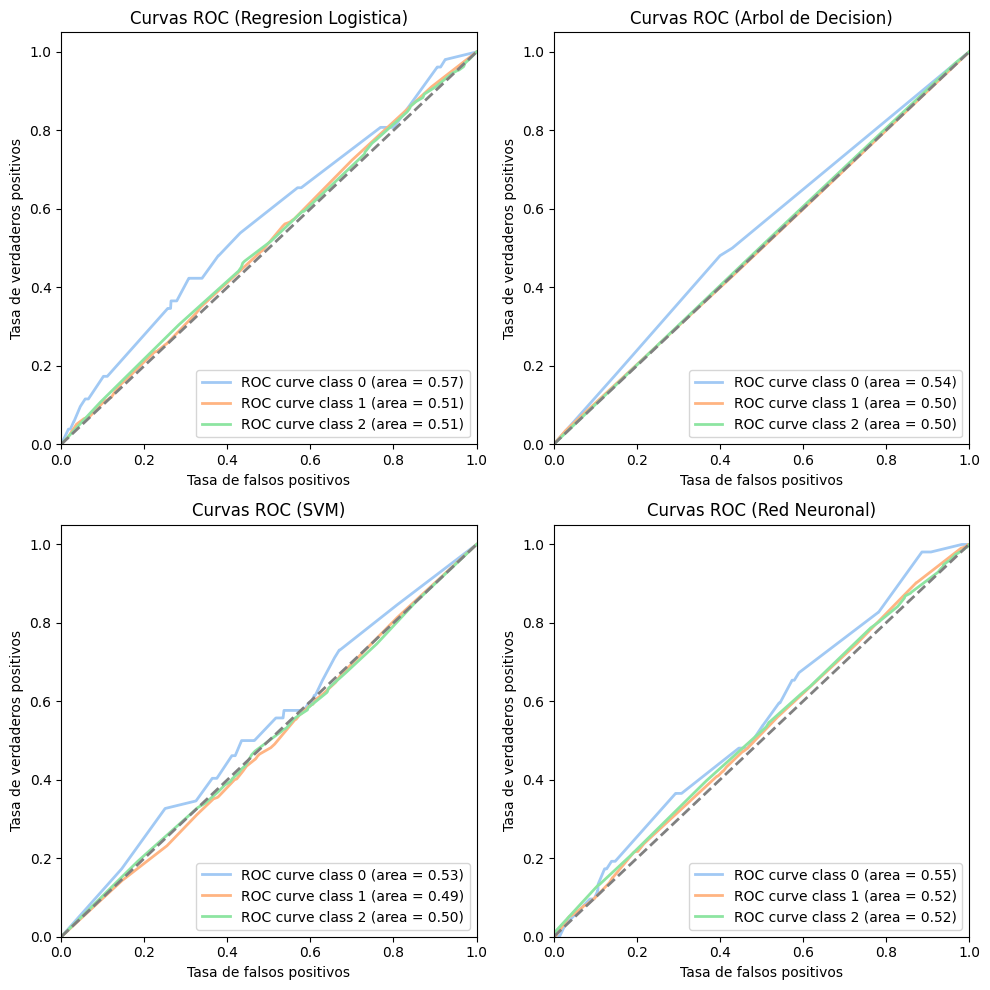

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Definir los modelos
models = [
    ('Regresion Logistica', LogisticRegression(solver='liblinear')),
    ('Arbol de Decision', DecisionTreeClassifier()),
    ('SVM', SVC(probability=True)),  # Asegúrate de que probability=True
    ('Red Neuronal', MLPClassifier())
]

# Hiperparámetros para la búsqueda
params = [
    {'Regresion Logistica__C': [1, 10],  # Cambiado 'Cs' a 'C'
     'Regresion Logistica__penalty': ['l1', 'l2'],
     'Regresion Logistica__solver': ['liblinear']},

    {'Arbol de Decision__max_depth': [2, 4, 6],
     'Arbol de Decision__min_samples_split': [2, 4, 6]},

    {'SVM__C': [0.1, 1, 10],
     'SVM__kernel': ['linear', 'rbf'],
     'SVM__probability': [True]},  # Asegúrate de que probability=True

    {'Red Neuronal__hidden_layer_sizes': [(10,), (50,), (100,)],
     'Red Neuronal__activation': ['relu', 'logistic'],
     'Red Neuronal__alpha': [0.0001, 0.01, 0.1]}
]

# Datos (debes definir X_train, X_test, y_train, y_test)
# X_train, X_test, y_train, y_test = ...

result = []
best_models = []

# Búsqueda de hiperparámetros para cada modelo
for i, (name, model) in enumerate(models):
    pipe = Pipeline([(name, model)])
    grid = GridSearchCV(pipe, params[i], cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')
    grid.fit(X_train, y_train)

    best_model = (name, grid.best_estimator_)
    best_score = grid.best_score_
    best_models.append(best_model)
    result.append({'Modelo': name, 'Score': round(best_score, 5), 'Hiperparámetros': grid.best_params_})

    print(name + ':')
    print('Mejores parametros:', grid.best_params_)
    print('Precisión del entrenamiento:', round(grid.best_score_, 5))
    print('Precisión del test:', round(grid.score(X_test, y_test), 5))
    print('--------------------------------------------')

# Ordenar los resultados
result = sorted(result, key=lambda k: k['Score'], reverse=True)
print('Orden de los modelos: ')
for res in result:
    print(res)

# Binarizar las etiquetas para clasificación multiclase
y_test_bin = label_binarize(y_test, classes=best_models[0][1].named_steps['Regresion Logistica'].classes_)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axs = axs.flatten()

for i, (name, model) in enumerate(best_models):
    # Obtener las probabilidades de clase para todas las clases
    y_pred_proba = model.predict_proba(X_test)

    # Calcular la curva ROC y el AUC para cada clase
    for j in range(y_test_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_bin[:, j], y_pred_proba[:, j])
        roc_auc = auc(fpr, tpr)

        # Crear un DataFrame temporal para el gráfico
        df_temp = pd.DataFrame({'fpr': fpr, 'tpr': tpr})

        # Configurar los colores
        colors = sns.color_palette('pastel')

        # Trazar la curva ROC para cada clase
        sns.lineplot(x='fpr', y='tpr', data=df_temp, color=colors[j], lw=2, label='ROC curve class %d (area = %0.2f)' % (j, roc_auc), ax=axs[i])

    # Trazar la línea diagonal (por azar)
    axs[i].plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

    # Configurar los ejes
    axs[i].set_xlim([0.0, 1.0])
    axs[i].set_ylim([0.0, 1.05])
    axs[i].set_xlabel('Tasa de falsos positivos')
    axs[i].set_ylabel('Tasa de verdaderos positivos')
    axs[i].set_title('Curvas ROC (' + name + ')')
    axs[i].legend(loc="lower right")

plt.tight_layout()
plt.show()




# **8. Conclusión**

El análisis exhaustivo de los datos de accidentes de tráfico ha proporcionado una comprensión profunda de los factores que influyen en la ocurrencia y severidad de los accidentes. Factores como los patrones temporales, las características del conductor y las condiciones de la carretera emergen como elementos clave en la predicción de accidentes. Por ejemplo, se observó que la falta de distancia entre vehículos, los cambios de carril sin precaución y la conducción a alta velocidad son contribuyentes significativos a la ocurrencia de accidentes.

Para abordar este problema, se aplicaron cuatro modelos de aprendizaje automático: Regresión Logística, Árbol de Decisión, SVM y Red Neuronal. Tras la optimización de hiperparámetros, los resultados mostraron que todos los modelos alcanzaron un rendimiento comparable, con una ligera ventaja para la Regresión Logística y Árbol de Decisión en términos de precisión tanto en el conjunto de entrenamiento como en el de prueba. Este desempeño consistente indica que los datos están bien ajustados, y cualquiera de los modelos podría ser utilizado dependiendo de las necesidades específicas del análisis, como la interpretabilidad o la velocidad de entrenamiento.

No obstante, es fundamental reconocer que la predicción de accidentes es un desafío complejo y multifacético. La precisión de estos modelos depende en gran medida de la calidad y cantidad de datos disponibles, así como de la selección adecuada de variables predictoras. La implementación práctica de estos modelos puede ser utilizada para identificar áreas de alto riesgo y desarrollar estrategias de prevención más efectivas.

En conclusión, este estudio establece una base sólida para futuras investigaciones y el desarrollo de herramientas de apoyo a la toma de decisiones para mejorar la seguridad vial. La combinación de análisis de datos, modelado predictivo y políticas públicas informadas puede conducir a una reducción significativa de los accidentes de tráfico y sus consecuencias negativas. Este enfoque integral no solo mejora la capacidad de predecir accidentes, sino que también proporciona una guía valiosa para la formulación de estrategias de intervención que pueden salvar vidas y reducir daños en las carreteras.